In [1]:
# --------------------------
# 1. Essential Libraries
# --------------------------
import os  # For file and directory management
import time  # For timing operations and controlling execution speed
import re  # For regular expressions
import textwrap  # For text formatting and wrapping
import numpy as np  # For numerical operations (e.g., arrays and matrices)
import pandas as pd  # For data manipulation and analysis (DataFrame handling)

# --------------------------
# 2. Plotting Libraries
# --------------------------
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Advanced and aesthetically pleasing plots
%matplotlib inline  
# Enables inline plotting in Jupyter Notebooks

# --------------------------
# 3. Natural Language Processing (NLP) Libraries
# --------------------------
import nltk  # Natural Language Toolkit for text processing
from wordcloud import WordCloud  # Visualization of text data as word clouds

# Download necessary NLTK resources (used for tokenization and stopwords)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')  # Download stopwords for text processing
nltk.download('wordnet')  # Download WordNet for lemmatization
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')

# --------------------------
# 4. Machine Learning and Clustering
# --------------------------
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # For feature scaling
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization (converting text to numerical data)
from sklearn.decomposition import PCA  # For dimensionality reduction (reducing feature space)
from sklearn.metrics import silhouette_score  # For clustering evaluation (measuring cluster quality)
from sklearn.cluster import KMeans, DBSCAN  # Clustering algorithms (KMeans and DBSCAN)
from sklearn.neighbors import NearestNeighbors  # For DBSCAN parameter tuning (nearest neighbor search)
from sklearn.metrics.pairwise import cosine_distances  # For distance metrics (e.g., cosine similarity)
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

# --------------------------
# 5. Hierarchical Clustering
# --------------------------
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster  # Utilities for hierarchical clustering

# --------------------------
# 6. Sparse Matrices
# --------------------------
from scipy.sparse import hstack  # Horizontal stacking of sparse matrices

# --------------------------
# 7. IMDb Access
# --------------------------
from imdb import IMDb  # IMDb database access (fetching movie details)
from imdb._exceptions import IMDbDataAccessError  # Handle errors when accessing IMDb data

# --------------------------
# 8. Multithreading
# --------------------------
from concurrent.futures import ThreadPoolExecutor  # For parallel execution using multithreading

# --------------------------
# 9. Additional NLP Preprocessing Libraries
# --------------------------
import string  # For handling string operations (e.g., punctuation)
from nltk.corpus import stopwords  # For stopword removal in text processing
from nltk.tokenize import word_tokenize  # For tokenizing text into words
from nltk.stem import PorterStemmer,  WordNetLemmatizer  # For stemming (reducing words to their root form)
from num2words import num2words  # For converting numbers to words (e.g., 100 to 'one hundred')
from nltk import pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package average

# Table of Contents
- [Data Loading and Preparation](#Data-Loading-and-Preparation)
   - [Data Loading](#Data-Loading)
   - [Data Preprocessing](#Data-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Clustering](#Clustering)
- [Apriori Algorithm and Association Rules](#Apriori Algorithm and Association rules)

# Data Loading and Preprocessing

## Data Loading

We load two datasets from Kaggle’s Netflix Movie Rating Dataset (https://www.kaggle.com/datasets/rishitjavia/netflix-movie-rating-dataset/data?select=Netflix_Dataset_Rating.csv):
1) The movies dataset (Netflix_Dataset_Movie.csv), containing metadata about the movies, such as movie IDs, titles, and other descriptive information.
2) The ratings dataset (Netflix_Dataset_Rating.csv), containing user ratings for movies.

These datasets are loaded using pandas.read_csv to read the CSV files into DataFrames. 

In [4]:
file_path = "C:/Users/Maria/OneDrive/Documents/DTU classes/A24/Comp/Computational/Netflix_Dataset_Movie.csv"
movies = pd.read_csv(file_path, low_memory=False)
movies

Movie_ID  Year                                               Name
0             1  2003                                    Dinosaur Planet
1             2  2004                         Isle of Man TT 2004 Review
2             3  1997                                          Character
3             4  1994                       Paula Abdul's Get Up & Dance
4             5  2004                           The Rise and Fall of ECW
...         ...   ...                                                ...
17765     17766  2002  Where the Wild Things Are and Other Maurice Se...
17766     17767  2004                  Fidel Castro: American Experience
17767     17768  2000                                              Epoch
17768     17769  2003                                        The Company
17769     17770  2003                                       Alien Hunter

[17770 rows x 3 columns]

In [6]:
file_path2 = "C:/Users/Maria/OneDrive/Documents/DTU classes/A24/Comp/Computational/Netflix_Dataset_Rating.csv"
ratings = pd.read_csv(file_path2, low_memory=False)
ratings

User_ID  Rating  Movie_ID
0          712664       5         3
1         1331154       4         3
2         2632461       3         3
3           44937       5         3
4          656399       4         3
...           ...     ...       ...
17337453   520675       3      4496
17337454  1055714       5      4496
17337455  2643029       4      4496
17337456  1559566       3      4496
17337457   293198       3      4496

[17337458 rows x 3 columns]

The info() method is used to display the structure of each dataset, such as column names, data types, and potential missing values. 

The describe() method provides summary statistics for numerical columns, helping to understand the data's range, mean, and distribution. These steps ensure that the datasets are well-understood before further processing begins.

In [7]:
# Display general information about the movies dataset
print(movies.info())

# Display summary statistics for numerical columns to understand their distribution
print(movies.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB
None
           Movie_ID          Year
count  17770.000000  17770.000000
mean    8885.500000   1990.235566
std     5129.901477     16.564501
min        1.000000   1915.000000
25%     4443.250000   1985.000000
50%     8885.500000   1997.000000
75%    13327.750000   2002.000000
max    17770.000000   2005.000000


In [8]:
# Display general information about the ratings dataset
print(ratings.info())

# Display summary statistics for numerical columns to understand their distribution
print(ratings.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   User_ID   int64
 1   Rating    int64
 2   Movie_ID  int64
dtypes: int64(3)
memory usage: 396.8 MB
None
            User_ID        Rating      Movie_ID
count  1.733746e+07  1.733746e+07  1.733746e+07
mean   1.321158e+06  3.590570e+00  2.302783e+03
std    7.646923e+05  1.062665e+00  1.303458e+03
min    6.000000e+00  1.000000e+00  3.000000e+00
25%    6.602280e+05  3.000000e+00  1.176000e+03
50%    1.316775e+06  4.000000e+00  2.342000e+03
75%    1.983213e+06  4.000000e+00  3.433000e+03
max    2.649429e+06  5.000000e+00  4.496000e+03


## Data Preprocessing

Next, a subset of the movies dataset (the first 5000 rows) is selected and stored in a new DataFrame called df. This is done because the users in the ratings dataframe only rated some of the first 5000 movie IDs. Doing it this way we reduce the computation time during development.

In [9]:
# Sample DataFrame with movie titles
data = movies[0:5000]
df = pd.DataFrame(data)

An instance of the IMDb class is created with a timeout of 60 seconds. This instance will be used to query the IMDb database and retrieve movie metadata like descriptions, ratings, genres, and directors. The timeout is set to ensure that API calls do not hang indefinitely if there are connectivity issues.

In [10]:
# Create an IMDb instance with a timeout of 60 seconds
ia = IMDb(timeout=60)

fetch_movie_details_safe is defined to fetch movie details from IMDb safely. This function takes the movie title as input and searches for it on IMDb. If the movie is found, it retrieves metadata such as the plot outline, rating, genres, and directors. Otherwise, if an error occurs (e.g., a movie cannot be found or there is a data access issue), the function returns None for each of the fields. Note that a time.sleep(1) call is included between API requests to avoid exceeding IMDb’s rate limits. This error handling ensures that the script runs smoothly even if some movie details cannot be fetched.

In [11]:
# Define the function to fetch movie details 
def fetch_movie_details_safe(title):
    """
    Fetch details of a movie from IMDb safely, returning None for fields in case of errors.

    Parameters:
    - title: Title of the movie to search.

    Returns:
    - A dictionary containing description, rating, genres, and director.
    """
    try:
        movies = ia.search_movie(title)
        if not movies:
            return {'description': None, 'rating': None, 'genres': None, 'director': None}

        movie = ia.get_movie(movies[0].movieID)
        description = movie.get('plot outline', None)
        rating = movie.get('rating', None)
        genres = ', '.join(movie.get('genres', []))
        directors = ', '.join([str(director) for director in movie.get('director', [])])
        time.sleep(1)
        
        return {'description': description, 'rating': rating, 'genres': genres, 'director': directors}
    except IMDbDataAccessError:
        return {'description': None, 'rating': None, 'genres': None, 'director': None}
    except Exception:
        # Suppress errors by returning empty values without logging anything
        return {'description': None, 'rating': None, 'genres': None, 'director': None}

Given that the dataset is large, the code processes the movies in chunks to avoid running out of memory. The process_and_save_chunk function processes a chunk of movies by fetching their IMDb details using the previously defined function and combines the original movie data with the newly fetched metadata. Then, it saves the processed chunk to a temporary CSV file.

In [12]:
# Process chunks and save incrementally
def process_and_save_chunk(chunk, chunk_index, output_dir):
    """
    Process a chunk of movie data by fetching IMDb details and save results incrementally.

    Parameters:
    - chunk: Subset of the DataFrame containing movie titles.
    - chunk_index: Index of the current chunk.
    - output_dir: Directory to save chunk results.

    Returns:
    - Path to the saved chunk file.
    """
    with ThreadPoolExecutor(max_workers=10) as executor:
        results = list(executor.map(fetch_movie_details_safe, chunk['Name']))
    
    # Create a DataFrame for the results
    details_df = pd.DataFrame(results)
    chunk = pd.concat([chunk.reset_index(drop=True), details_df], axis=1)
    
    # Save the chunk to a temporary file
    chunk_file = os.path.join(output_dir, f"chunk_{chunk_index}.csv")
    chunk.to_csv(chunk_file, index=False)
    print(f"Saved chunk {chunk_index} to {chunk_file}")
    return chunk_file

The process_all_chunks function splits the dataset into smaller chunks and processes them one at a time using process_and_save_chunk. 

In [13]:
# Main function to process all chunks
def process_all_chunks(df, chunk_size=100, output_dir="temp_chunks"):
    """
    Process the DataFrame in chunks and save results incrementally.

    Parameters:
    - df: DataFrame containing movie data.
    - chunk_size: Number of rows per chunk.
    - output_dir: Directory to save chunk files.

    Returns:
    - List of chunk file paths.
    """
    os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist
    chunks = np.array_split(df, np.ceil(len(df) / chunk_size)) # Split DataFrame into chunks
    chunk_files = []

    for chunk_index, chunk in enumerate(chunks):
        chunk_file = process_and_save_chunk(chunk, chunk_index, output_dir)
        chunk_files.append(chunk_file)

    return chunk_files

Finally, the combine_chunk_files function merges all the individual chunk files into a single consolidated CSV file, making it easier to analyze the entire dataset. This chunk-based approach ensures that the memory usage is efficient and data is saved incrementally, which is useful in case the process is interrupted.

In [14]:
# Combine all chunk files into a single CSV
def combine_chunk_files(chunk_files, output_file="movies_data.csv"):
    """
    Combine all processed chunk files into a single CSV.

    Parameters:
    - chunk_files: List of file paths to chunk files.
    - output_file: Path to the final combined file.

    Returns:
    - None
    """
    combined_df = pd.concat([pd.read_csv(chunk_file) for chunk_file in chunk_files], ignore_index=True)
    combined_df.to_csv(output_file, index=False)
    print(f"Combined all chunks into {output_file}")

We run the functions above for movies_df.csv file. As it takes a while to run, after it was run once, we commented it not to run it again by mistake.

In [15]:
#chunk_files = process_all_chunks(df, chunk_size=100, output_dir="temp_chunks_f")
#combine_chunk_files(chunk_files, output_file="movies_df.csv")


The consolidated dataset is loaded, and rows with missing values are removed to ensure data quality and integrity. By dropping rows with incomplete information, the dataset becomes more reliable for analysis or modeling tasks. This step prepares the data for integration with other datasets.

In [18]:
file_path3 = "C:/Users/Maria/OneDrive/Documents/DTU classes/A24/Comp/Computational/movies_df.csv"
movies_f  = pd.read_csv(file_path3, low_memory=False)

# Drop rows with any empty (NaN) values
movies_f_cleaned = movies_f.dropna()

In [19]:
movies_f_cleaned

Movie_ID  Year                          Name  \
1            2  2004    Isle of Man TT 2004 Review   
2            3  1997                     Character   
3            4  1994  Paula Abdul's Get Up & Dance   
5            6  1997                          Sick   
8            9  1991      Class of Nuke 'Em High 2   
...        ...   ...                           ...   
4995      4996  2000            Gone in 60 Seconds   
4996      4997  2004            Alabama Love Story   
4997      4998  1948                 Anna Karenina   
4998      4999  2001                   Lucky Break   
4999      5000  1994         Getting Even with Dad   

                                            description  rating  \
1     The Isle of Man TT is described as the world's...     7.7   
2     In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
3     When it's your teddy bear's birthday, you want...     9.3   
5     During the pandemic, Parker and her best frien...     6.0   
8     An accident at a nuclear plant causes a radioa...     5.6   
...                                                 ...     ...   
4995  Insurance investigator Maindrian Pace and his ...     6.3   
4996  A broken down ex-rodeo cowboy, Roper, is down ...     6.6   
4997  In 1874, in the Imperial Russia, the aristocra...     6.6   
4998  Half-way through his 12-year prison sentence f...     6.2   
4999  Ray, an ex-con and widower, is planning a coin...     4.9   

                                genres  \
1                   Documentary, Sport   
2      Crime, Drama, Mystery, Thriller   
3               Short, Family, Musical   
5            Horror, Mystery, Thriller   
8     Comedy, Horror, Sci-Fi, Thriller   
...                                ...   
4995    Action, Crime, Drama, Thriller   
4996                    Drama, Western   
4997                    Drama, Romance   
4998            Comedy, Crime, Romance   
4999             Comedy, Crime, Family   

                                             director  
1                                       David Niblock  
2                                       Mike van Diem  
3     John Ferraro, Mustapha Khan, Ted May, Jon Stone  
5                                          John Hyams  
8                    Richard W. Haines, Lloyd Kaufman  
...                                               ...  
4995                                     H.B. Halicki  
4996                                    Terry Moloney  
4997                                       Joe Wright  
4998                                   Peter Cattaneo  
4999                                    Howard Deutch  

[3105 rows x 7 columns]

The cleaned movies dataset is merged with the ratings dataset using the Movie_ID column. This results in a unified dataset that combines user ratings with enriched movie metadata.

In [20]:
# Merge the ratings dataset with cleaned movie details
df_combined_left = pd.merge(ratings, movies_f_cleaned, on='Movie_ID', how='left')
df_combined_left

User_ID  Rating  Movie_ID    Year                   Name  \
0          712664       5         3  1997.0              Character   
1         1331154       4         3  1997.0              Character   
2         2632461       3         3  1997.0              Character   
3           44937       5         3  1997.0              Character   
4          656399       4         3  1997.0              Character   
...           ...     ...       ...     ...                    ...   
17337453   520675       3      4496  1993.0  Farewell My Concubine   
17337454  1055714       5      4496  1993.0  Farewell My Concubine   
17337455  2643029       4      4496  1993.0  Farewell My Concubine   
17337456  1559566       3      4496  1993.0  Farewell My Concubine   
17337457   293198       3      4496  1993.0  Farewell My Concubine   

                                                description  rating  \
0         In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
1         In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
2         In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
3         In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
4         In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
...                                                     ...     ...   
17337453  "Farewell, My Concubine" is a movie with two p...     8.1   
17337454  "Farewell, My Concubine" is a movie with two p...     8.1   
17337455  "Farewell, My Concubine" is a movie with two p...     8.1   
17337456  "Farewell, My Concubine" is a movie with two p...     8.1   
17337457  "Farewell, My Concubine" is a movie with two p...     8.1   

                                   genres       director  
0         Crime, Drama, Mystery, Thriller  Mike van Diem  
1         Crime, Drama, Mystery, Thriller  Mike van Diem  
2         Crime, Drama, Mystery, Thriller  Mike van Diem  
3         Crime, Drama, Mystery, Thriller  Mike van Diem  
4         Crime, Drama, Mystery, Thriller  Mike van Diem  
...                                   ...            ...  
17337453            Drama, Music, Romance     Kaige Chen  
17337454            Drama, Music, Romance     Kaige Chen  
17337455            Drama, Music, Romance     Kaige Chen  
17337456            Drama, Music, Romance     Kaige Chen  
17337457            Drama, Music, Romance     Kaige Chen  

[17337458 rows x 9 columns]

Moreover, the code filters out movies that are not present in the ratings dataset to retain only those with complete user feedback and IMDb details. This final dataset is well-suited for analysis or building models, such as recommendation systems.

In [21]:
# Get movies present only in the user ratings dataset
# We already know that ratings does not have missing values
movies_df = movies_f_cleaned[movies_f_cleaned["Movie_ID"].isin(ratings["Movie_ID"])]
movies_df=movies_df.reset_index(drop=True)
movies_df

Movie_ID  Year                    Name  \
0            3  1997               Character   
1           16  1996               Screamers   
2           18  1994        Immortal Beloved   
3           26  2004         Never Die Alone   
4           30  2003  Something's Gotta Give   
...        ...   ...                     ...   
1058      4488  2000             Wonder Boys   
1059      4490  2004               Ned Kelly   
1060      4492  2004              Club Dread   
1061      4493  2003       Ju-on: The Grudge   
1062      4496  1993   Farewell My Concubine   

                                            description  rating  \
0     In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
1     On the distant mining planet Sirius 6B ravaged...     6.3   
2     The life and death of the legendary Ludwig van...     7.4   
3     A film noir centering around a hard-boiled, st...     5.6   
4     Harry Sanborn is an aged music industry exec w...     6.7   
...                                                 ...     ...   
1058  Grady Tripp is a professor/writer living in Pi...     7.2   
1059  Though recognized for heroism as a lad, Ned Ke...     6.4   
1060  Broken Lizard is surrounded by limber, wanton ...     5.7   
1061  In Japan, when the volunteer social assistant ...     6.7   
1062  "Farewell, My Concubine" is a movie with two p...     8.1   

                                                 genres             director  
0                       Crime, Drama, Mystery, Thriller        Mike van Diem  
1                              Horror, Sci-Fi, Thriller     Christian Duguay  
2             Biography, Drama, Music, Mystery, Romance         Bernard Rose  
3                        Action, Crime, Drama, Thriller  Ernest R. Dickerson  
4                                Comedy, Drama, Romance         Nancy Meyers  
...                                                 ...                  ...  
1058                                      Comedy, Drama        Curtis Hanson  
1059  Action, Adventure, Biography, Crime, Drama, Hi...        Gregor Jordan  
1060                  Comedy, Horror, Mystery, Thriller    Jay Chandrasekhar  
1061                                             Horror      Takashi Shimizu  
1062                              Drama, Music, Romance           Kaige Chen  

[1063 rows x 7 columns]

After preprocessing we get the dataframe movies_df of size 1063 with the following columns:
1) `Movie_ID`: A unique identifier for each movie.
2) `Year`: The year the movie was released.
3) `Name`: The title of the movie.
4) `Description`: A short description or plot summary of the movie.
5) `Rating`: The IMDb rating of the movie.
6) `Genres`: A list of genres associated with the movie, such as Drama, Action, Comedy, etc.
7) `Director`: The name(s) of the director(s) of the movie.
   
The dataframe ratings of size 17,337,458:
1) `User_ID `: A unique identifier for each user.
2) `Rating`: The rating given by the user (typically between 1 and 5).
3) `Movie_ID`: A unique identifier for each movie.

And the combined dataframe df_combined_left of size 17,337,458 :
1) `User_ID`: A unique identifier for each user who rated the movie.
2) `Rating`: The rating given by the user for a particular movie. The scale is typically from 1 to 5, with higher numbers indicating better ratings.
3) `Movie_ID`: A unique identifier for each movie.
4) `Year`: The year in which the movie was released.
5) `Name`: The name (title) of the movie.
6) `Description`: A textual description or plot summary of the movie.
7) `rating` (from IMDb data): The IMDb rating for the movie (this is a duplicate of the Rating column in the original ratings dataset).
8) `Genres`: The genres associated with the movie, such as "Drama", "Comedy", "Action", etc. Multiple genres are often listed, separated by commas.
9) `Director`: The name(s) of the director(s) of the movie.


# Exploratory Data Analysis

Exploratory data analysis is crucial to understand the data that we are going to work with. Both datasets will be analysed to extract relevant information about their features.

## Movies Dataset: movies_df

The first step is to visualize the data and its format, understand what variables exist and their their type and verify the presence of null values. For the numerical variables, descriptive statistics are presented and for the categorical ones we counted the frequency of unique values.

In [22]:
movies_df.head()

Movie_ID  Year                    Name  \
0         3  1997               Character   
1        16  1996               Screamers   
2        18  1994        Immortal Beloved   
3        26  2004         Never Die Alone   
4        30  2003  Something's Gotta Give   

                                         description  rating  \
0  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
1  On the distant mining planet Sirius 6B ravaged...     6.3   
2  The life and death of the legendary Ludwig van...     7.4   
3  A film noir centering around a hard-boiled, st...     5.6   
4  Harry Sanborn is an aged music industry exec w...     6.7   

                                      genres             director  
0            Crime, Drama, Mystery, Thriller        Mike van Diem  
1                   Horror, Sci-Fi, Thriller     Christian Duguay  
2  Biography, Drama, Music, Mystery, Romance         Bernard Rose  
3             Action, Crime, Drama, Thriller  Ernest R. Dickerson  
4                     Comedy, Drama, Romance         Nancy Meyers

In [23]:
print('Shape: '+str(movies_df.shape))

Shape: (1063, 7)


In [24]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie_ID     1063 non-null   int64  
 1   Year         1063 non-null   int64  
 2   Name         1063 non-null   object 
 3   description  1063 non-null   object 
 4   rating       1063 non-null   float64
 5   genres       1063 non-null   object 
 6   director     1063 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 58.3+ KB


In [25]:
print('Null values')
print(movies_df.isnull().sum())

Null values
Movie_ID       0
Year           0
Name           0
description    0
rating         0
genres         0
director       0
dtype: int64


In [26]:
#Descriptive statistics for 'rating'
numeric_stats = movies_df['rating'].describe()
print("Descriptive Statistics for Ratings:")
print(numeric_stats)

Descriptive Statistics for Ratings:
count    1063.000000
mean        6.662277
std         0.950774
min         1.500000
25%         6.100000
50%         6.800000
75%         7.300000
max         9.200000
Name: rating, dtype: float64


In [27]:
#Descriptive statistics for 'Year'
numeric_stats = movies_df['Year'].describe()
print("Descriptive Statistics for Year:")
print(numeric_stats)

Descriptive Statistics for Year:
count    1063.000000
mean     1989.924741
std        15.878540
min      1920.000000
25%      1985.000000
50%      1995.000000
75%      2001.000000
max      2005.000000
Name: Year, dtype: float64


In [28]:
#Frequency count for 'genres' and 'director'
genre_counts = movies_df['genres'].value_counts()
director_counts = movies_df['director'].value_counts()

print("\nTop 10 Genres:")
print(genre_counts.head(10))

print("\nTop 10 Directors:")
print(director_counts.head(10))


Top 10 Genres:
genres
Comedy, Drama, Romance            65
Drama                             48
Comedy, Romance                   40
Comedy                            39
Drama, Romance                    36
Comedy, Drama                     28
Action, Crime, Thriller           19
Action, Crime, Drama, Thriller    18
Crime, Drama, Thriller            17
Comedy, Crime                     15
Name: count, dtype: int64

Top 10 Directors:
director
Alfred Hitchcock    9
James Cameron       6
Stephen Herek       6
Norman Jewison      5
Richard Donner      5
Spike Lee           5
Rob Reiner          5
Wes Craven          5
Howard Hawks        4
Walter Hill         4
Name: count, dtype: int64


### Univariate Analysis

Univariate analysis is helpful to understand the distribution of each variable and to identify possible outliers and dominant values.

<Axes: title={'center': 'Distribution of Movies by Year'}, ylabel='Frequency'>

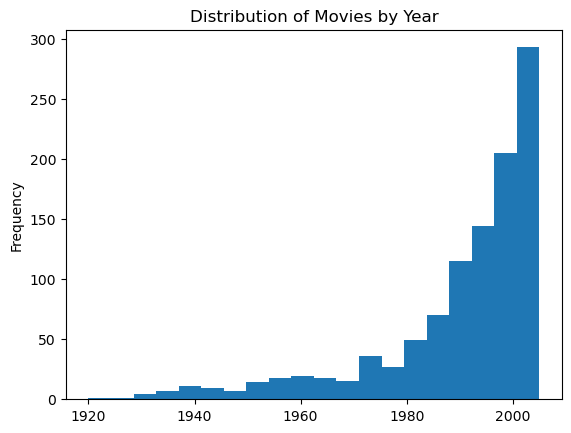

In [29]:
#Year
movies_df['Year'].plot(kind='hist', bins=20, title='Distribution of Movies by Year')

The dataset includes movies from 1920 to around 2005 with the majority of movies being from after 1985.

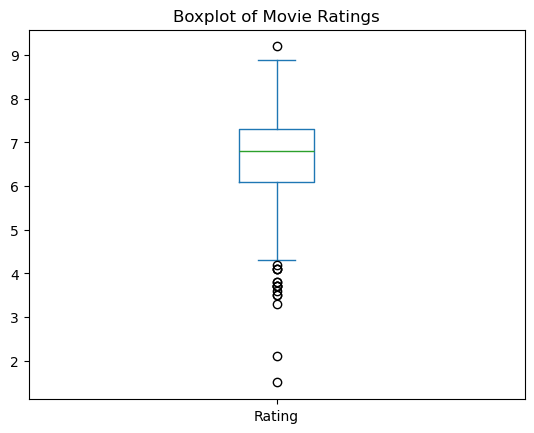

Text(0, 0.5, 'Frequency')

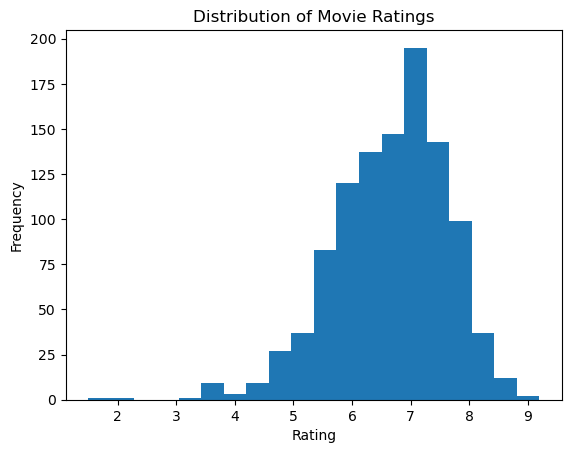

In [30]:
#rating
#boxplot
movies_df['rating'].plot(kind='box', title='Boxplot of Movie Ratings')
plt.xticks([1], ['Rating'])  
plt.xlabel('')  
plt.show()

#histogram
movies_df['rating'].plot(kind='hist', bins=20, title='Distribution of Movie Ratings')
plt.xlabel('Rating')  
plt.ylabel('Frequency')  

The plots show that most movies have high ratings, between 6 and 7.5, and that very high and very low ratings are rare.

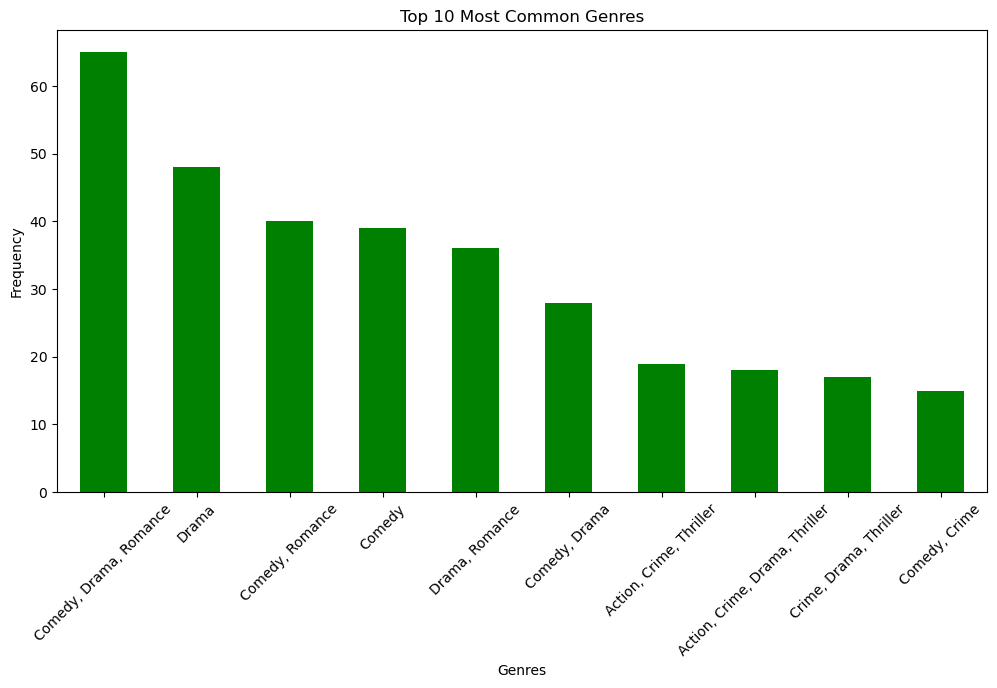

In [31]:
#genres
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The genre 'Drama' appears to be the most frequent one, categorizing many movies either as an unique genre or in a combination.

Genres:
['Crime' 'Drama' 'Mystery' 'Thriller' 'Horror' 'Sci-Fi' 'Biography'
 'Music' 'Romance' 'Action' 'Comedy' 'Fantasy' 'Animation' 'Adventure'
 'Family' 'Musical' 'Documentary' 'History' 'War' 'Sport' 'Western'
 'Short' 'Film-Noir']
Number of different genres:
23


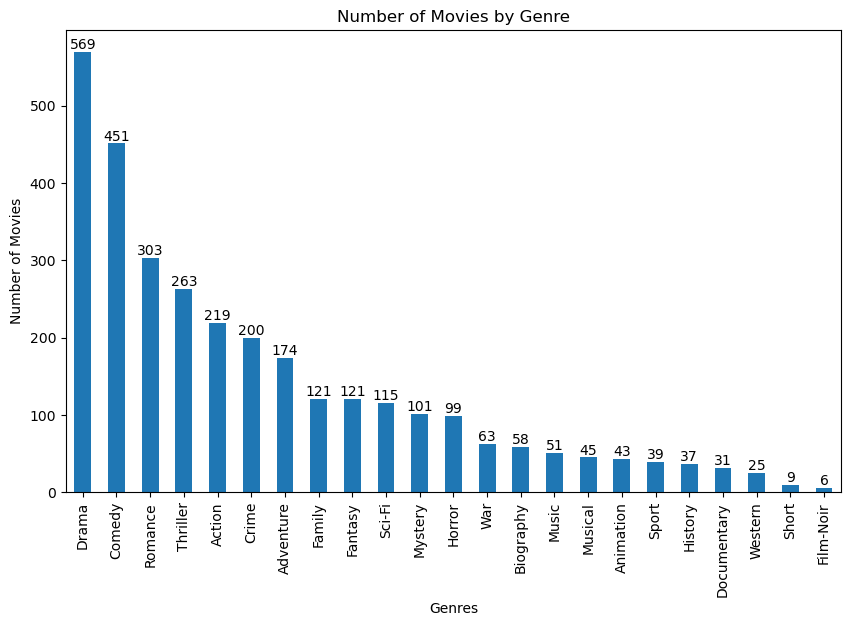

In [32]:
#genres
#separate every genre
copy_df=movies_df.copy()
copy_df['genres'] = copy_df['genres'].str.split(', ')
exploded_genres = copy_df.explode('genres')

genre_counts1 = exploded_genres['genres'].value_counts()

print('Genres:')
print(exploded_genres['genres'].unique())
print('Number of different genres:')
print(exploded_genres['genres'].nunique())

g_genre=genre_counts1.plot(kind='bar', title='Number of Movies by Genre', figsize=(10, 6))
plt.xlabel('Genres')
plt.ylabel('Number of Movies')

#count
for p in g_genre.patches:  
    g_genre.annotate(
        str(int(p.get_height())),  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='bottom'   
    )

plt.show()

Although in the dataset, the 'genres' variable is usually a combination of genres, we decided it would be helpful to know how many singular genres exist and their frequency in the dataset. From this plot, we can confirm that 'Drama' is the most frequent singular genre followed closely by 'Comedy' and then 'Romance'.

Number of directors: 792


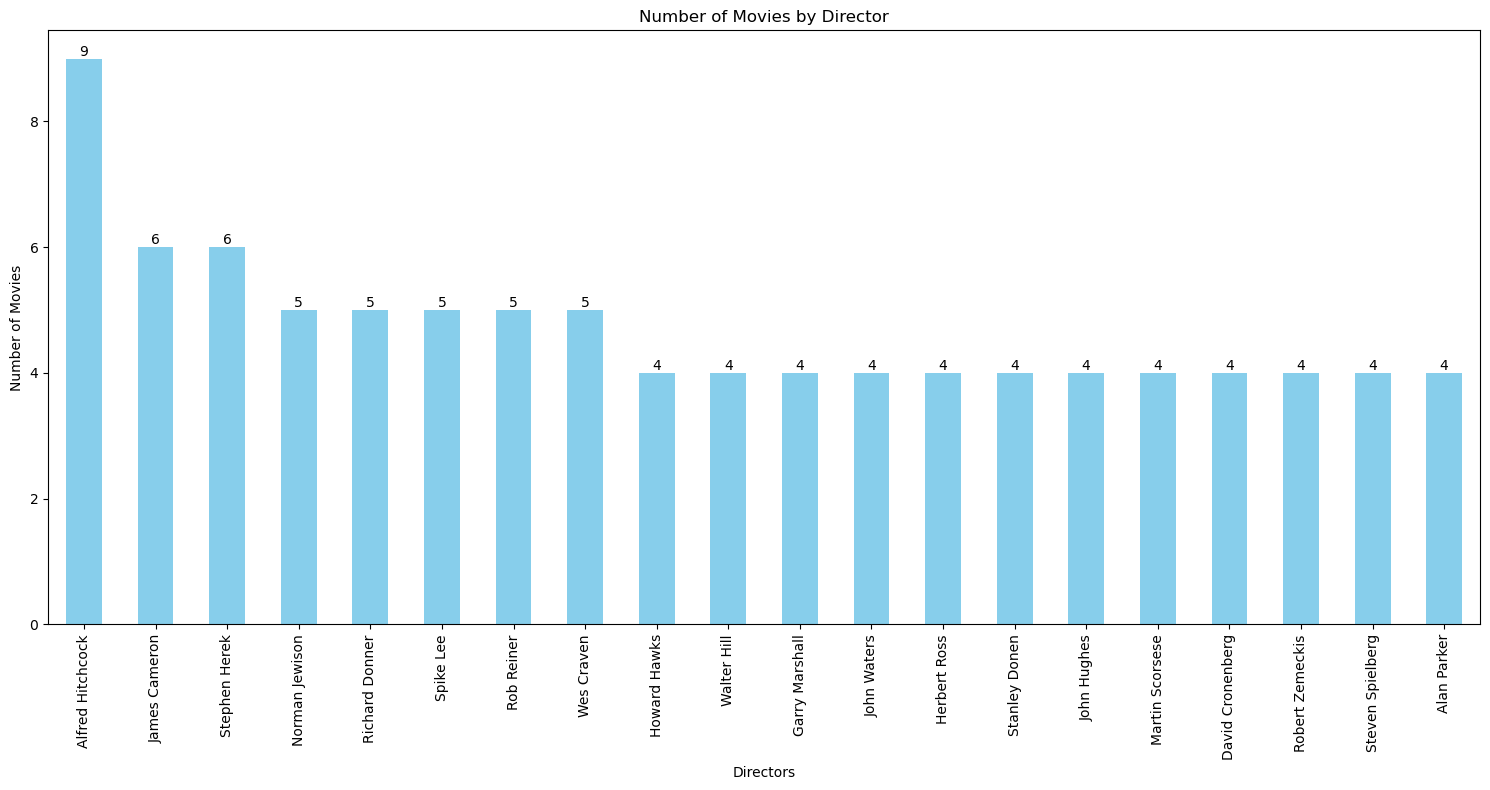

In [33]:
#director
print('Number of directors: '+str(len(director_counts)))
top_directors = director_counts.head(20)

g_director = top_directors.plot(kind='bar', title='Number of Movies by Director', figsize=(15, 8), color='skyblue')

plt.xlabel('Directors')
plt.ylabel('Number of Movies')

#count
for p in g_director.patches:
    g_director.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',  
        va='bottom'   
    )

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The dataset comprises 1063 movies with 792 directors so a low count for each director was already expected and it is shown in the previous plot.

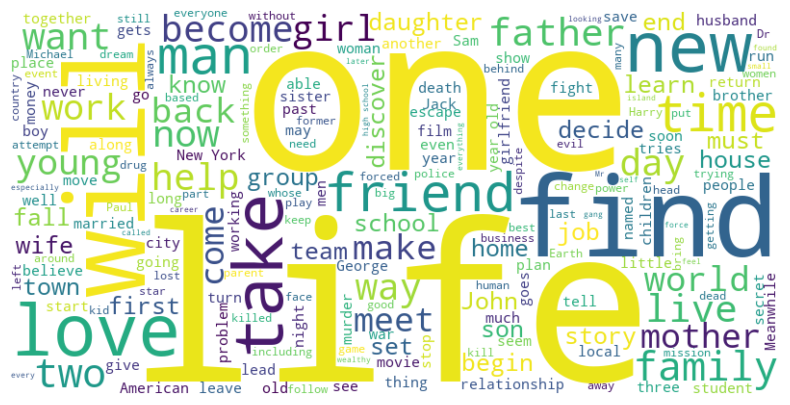

In [34]:
#description
#most frequent words
#it merges all the movies descriptions
text = ' '.join(copy_df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This wordcloud presents the most common words in the 'description' variable to have an overview of its composition.

<Axes: title={'center': 'Description Length Distribution'}, ylabel='Frequency'>

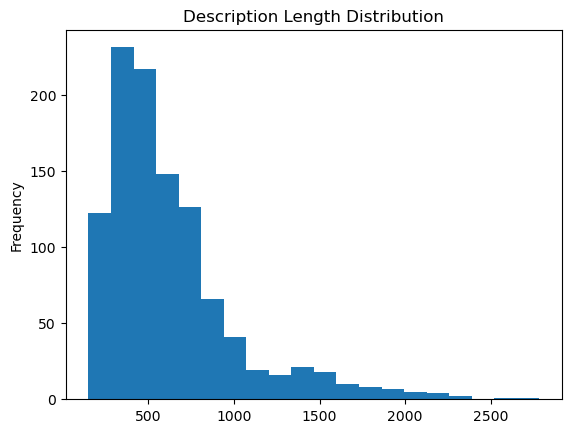

In [35]:
copy_df['description_length'] = copy_df['description'].apply(lambda x: len(str(x)))
copy_df['description_length'].plot(kind='hist', bins=20, title='Description Length Distribution')

The length of most descriptions lies around 300 to 700 characters

## Bivariate Analysis

Bivariate analysis explores relationships between two variables to look for possible patterns.

<Axes: title={'center': 'Ratings vs. Year'}, xlabel='Year', ylabel='rating'>

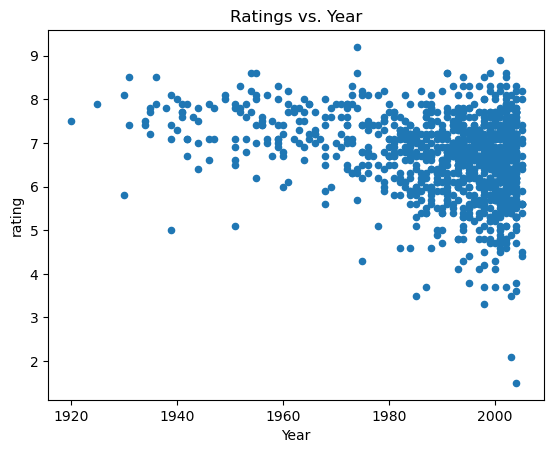

In [36]:
#Year vs rating
movies_df.plot.scatter(x='Year', y='rating', title='Ratings vs. Year')

Movies from before 1970 do not present ratings lower than 5. The majority of movies is more recent and although the worst rated movies are recent, most of them have a rating higher than 6.

<Axes: title={'center': 'Average Rating by Genre'}, xlabel='genres'>

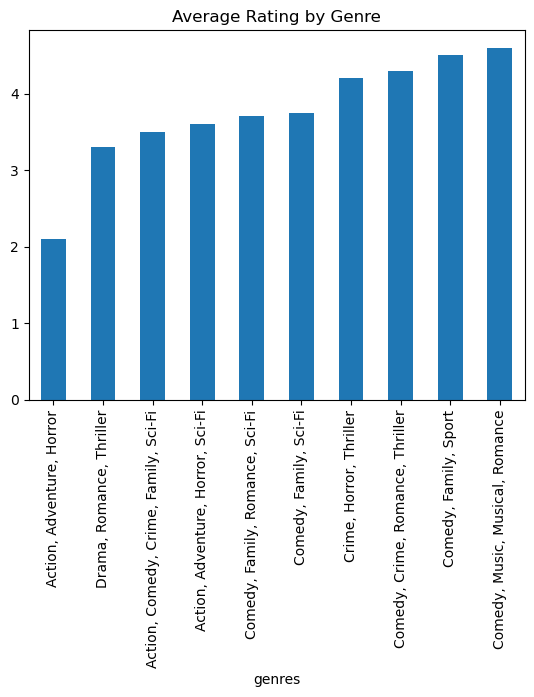

In [37]:
#Genre vs rating
average_rating_by_genre = movies_df.groupby('genres')['rating'].mean().sort_values()
average_rating_by_genre.head(10).plot(kind='bar', title='Average Rating by Genre')


<Axes: title={'center': 'Average Rating by Top Directors'}, xlabel='director'>

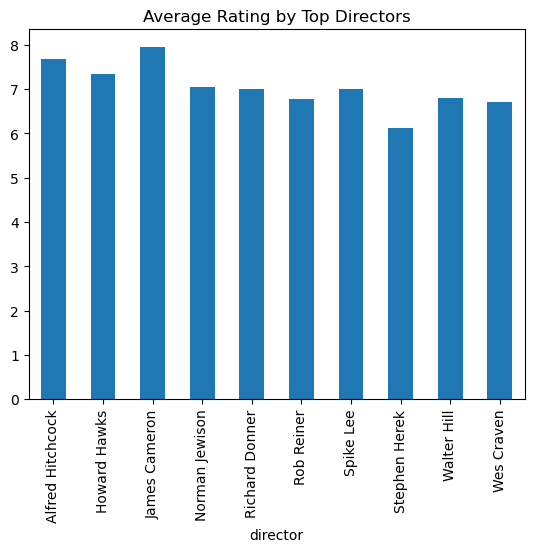

In [38]:
#Director vs Rating
top_directors = director_counts.head(10).index
director_rating = movies_df[movies_df['director'].isin(top_directors)].groupby('director')['rating'].mean()
director_rating.plot(kind='bar', title='Average Rating by Top Directors')

## Ratings Dataset: df_combined_left

For this dataset, we will follow the same process. Summary statistics are only presented for the numerical variables 'Rating', 'Year' and 'rating', while for 'genres' and 'director', we counted the frequency of unique values. Although the structure of both datasets is similar, it is important to do a separate exploratory analysis.

In [39]:
df_combined_left.head()

User_ID  Rating  Movie_ID    Year       Name  \
0   712664       5         3  1997.0  Character   
1  1331154       4         3  1997.0  Character   
2  2632461       3         3  1997.0  Character   
3    44937       5         3  1997.0  Character   
4   656399       4         3  1997.0  Character   

                                         description  rating  \
0  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
1  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
2  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
3  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
4  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   

                            genres       director  
0  Crime, Drama, Mystery, Thriller  Mike van Diem  
1  Crime, Drama, Mystery, Thriller  Mike van Diem  
2  Crime, Drama, Mystery, Thriller  Mike van Diem  
3  Crime, Drama, Mystery, Thriller  Mike van Diem  
4  Crime, Drama, Mystery, Thriller  Mike van Diem

In [40]:
print('Shape: '+str(df_combined_left.shape))

Shape: (17337458, 9)


In [41]:
df_combined_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   User_ID      int64  
 1   Rating       int64  
 2   Movie_ID     int64  
 3   Year         float64
 4   Name         object 
 5   description  object 
 6   rating       float64
 7   genres       object 
 8   director     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.2+ GB


In [42]:
print('Null values')
print(df_combined_left.isnull().sum())

Null values
User_ID              0
Rating               0
Movie_ID             0
Year           2262700
Name           2262700
description    2262700
rating         2262700
genres         2262700
director       2262700
dtype: int64


In [43]:
#Descriptive statistics for 'Rating' (user)
numeric_stats = df_combined_left['Rating'].describe()
print("Descriptive Statistics for User rating:")
print(numeric_stats)

Descriptive Statistics for User rating:
count    1.733746e+07
mean     3.590570e+00
std      1.062665e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64


In [44]:
#Descriptive statistics for 'Year'
numeric_stats = df_combined_left['Year'].describe()
print("Descriptive Statistics for Year:")
print(numeric_stats)

Descriptive Statistics for Year:
count    1.507476e+07
mean     1.993804e+03
std      1.267832e+01
min      1.920000e+03
25%      1.990000e+03
50%      1.999000e+03
75%      2.002000e+03
max      2.005000e+03
Name: Year, dtype: float64


In [45]:
#Descriptive statistics for 'rating' (overall)
numeric_stats = df_combined_left['rating'].describe()
print("Descriptive Statistics for Overall rating:")
print(numeric_stats)

Descriptive Statistics for Overall rating:
count    1.507476e+07
mean     6.972778e+00
std      8.589474e-01
min      1.500000e+00
25%      6.500000e+00
50%      7.000000e+00
75%      7.600000e+00
max      9.200000e+00
Name: rating, dtype: float64


In [46]:
#Frequency count for 'genres' and 'director'
genre_counts2 = df_combined_left['genres'].value_counts()
director_counts2 = df_combined_left['director'].value_counts()

print("\nTop 10 Genres:")
print(genre_counts2.head(10))

print("\nTop 10 Directors:")
print(director_counts2.head(10))


Top 10 Genres:
genres
Comedy, Drama, Romance            1228815
Drama                              783749
Comedy                             572586
Comedy, Romance                    553276
Action, Crime, Thriller            462102
Drama, Romance                     349421
Crime, Drama, Thriller             343154
Comedy, Drama                      306225
Action, Crime, Drama, Thriller     287257
Drama, Mystery, Thriller           269857
Name: count, dtype: int64

Top 10 Directors:
director
Tom Shadyac           237111
M. Night Shyamalan    233423
Steven Spielberg      206751
Richard Donner        193191
Nancy Meyers          180380
Rob Reiner            177601
Sam Mendes            176102
Mel Gibson            159991
Kevin Smith           144595
Quentin Tarantino     142778
Name: count, dtype: int64


### Univariate Analysis

<Axes: title={'center': 'Distribution of Ratings by Movie Year'}, ylabel='Frequency'>

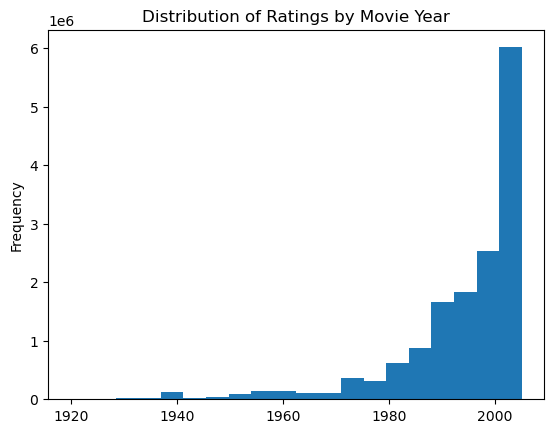

In [47]:
#Year
df_combined_left['Year'].plot(kind='hist', bins=20, title='Distribution of Ratings by Movie Year')

The majority of the ratings corresponds to movies from after 1990.

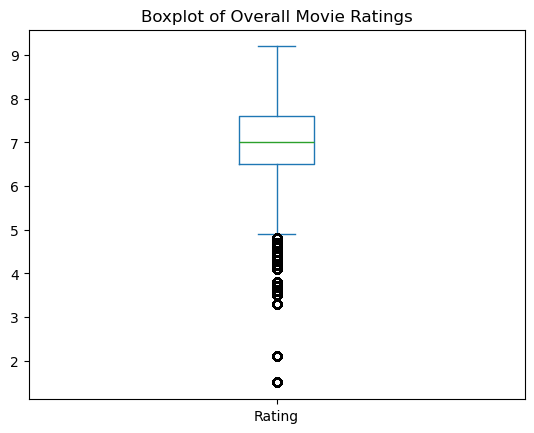

Text(0, 0.5, 'Frequency')

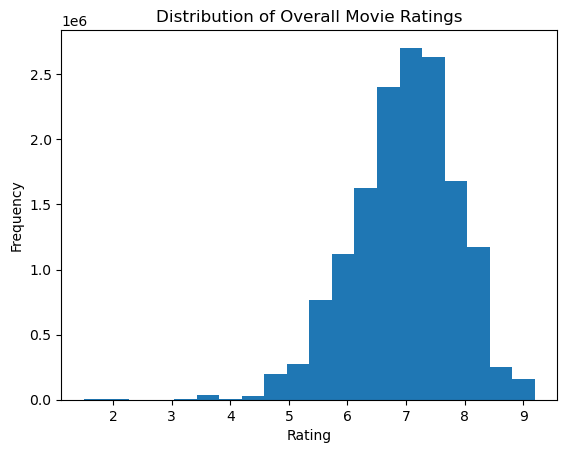

In [48]:
#overall rating
#boxplot
df_combined_left['rating'].plot(kind='box', title='Boxplot of Overall Movie Ratings')
plt.xticks([1], ['Rating'])  
plt.xlabel('')  
plt.show()

#histogram
df_combined_left['rating'].plot(kind='hist', bins=20, title='Distribution of Overall Movie Ratings')
plt.xlabel('Rating')  
plt.ylabel('Frequency')

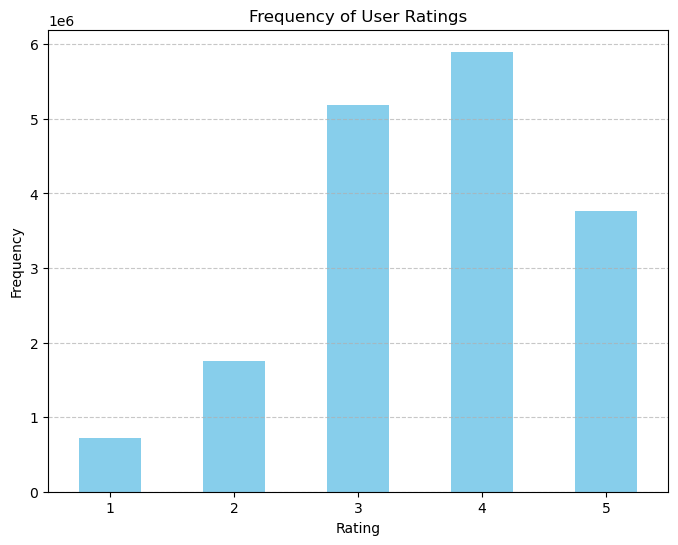

In [49]:
#user rating
plt.figure(figsize=(8, 6))
ratings_counts = df_combined_left['Rating'].value_counts().sort_index() 
ratings_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the plot, we can conclude that most ratings correspond to a 4 and that the majority of them has a good review.

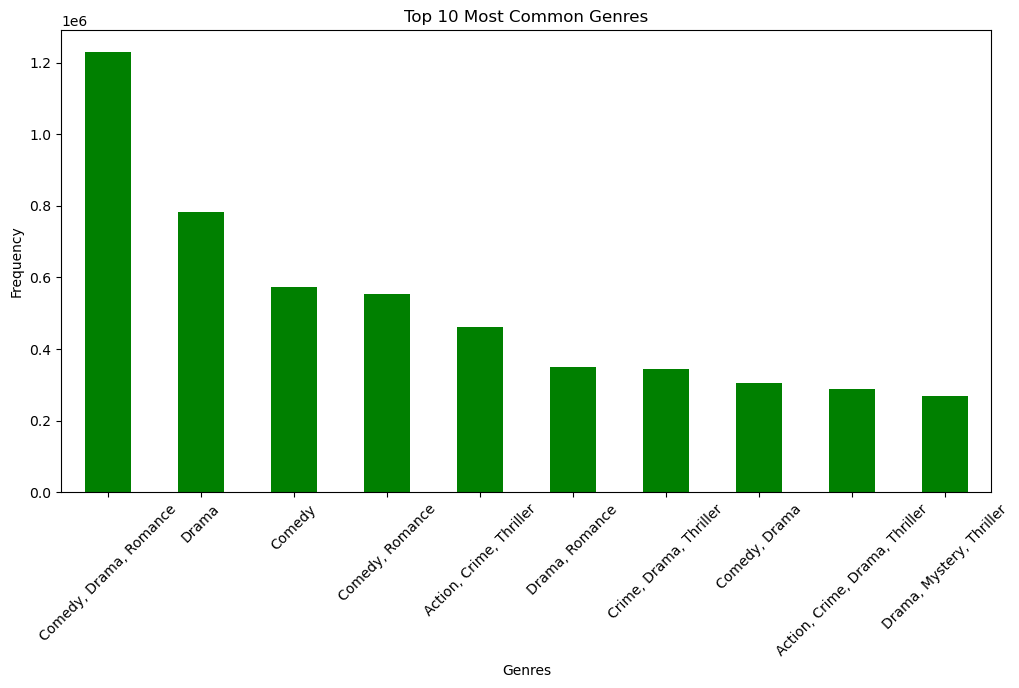

In [50]:
#genres
plt.figure(figsize=(12, 6))
genre_counts2.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The most common combination of genres in the this dataset correspond to a reordering of the frequent combinations of the movies_df dataset.

Genres:
['Crime' 'Drama' 'Mystery' 'Thriller' nan 'Horror' 'Sci-Fi' 'Biography'
 'Music' 'Romance' 'Action' 'Comedy' 'Fantasy' 'Animation' 'Adventure'
 'Family' 'Musical' 'Documentary' 'History' 'War' 'Sport' 'Western'
 'Short' 'Film-Noir']
Number of different genres:
23


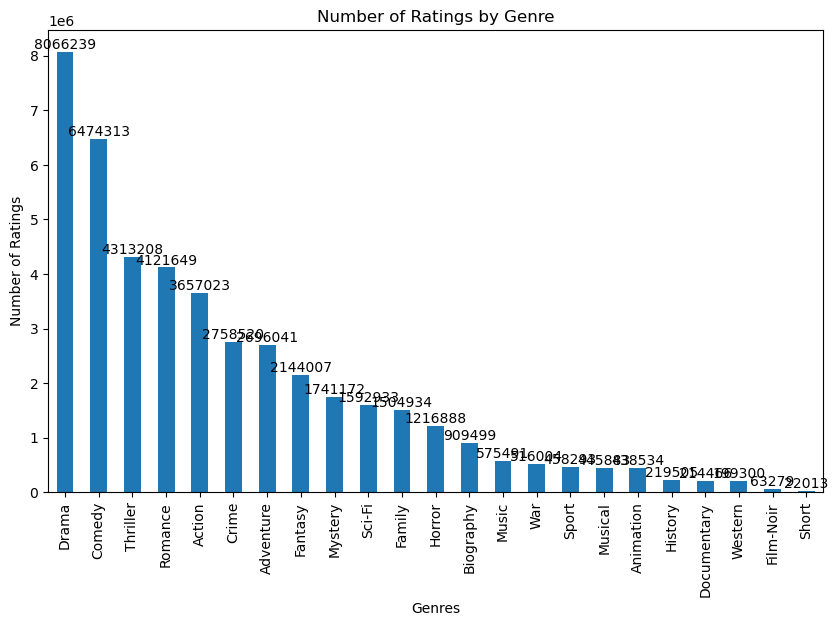

In [51]:
#genres
#separate every genre
copy_df=df_combined_left.copy()
copy_df['genres'] = copy_df['genres'].str.split(', ')
exploded_genres = copy_df.explode('genres')

genre_counts2 = exploded_genres['genres'].value_counts()

print('Genres:')
print(exploded_genres['genres'].unique())
print('Number of different genres:')
print(exploded_genres['genres'].nunique())

g_genre=genre_counts2.plot(kind='bar', title='Number of Ratings by Genre', figsize=(10, 6))
plt.xlabel('Genres')
plt.ylabel('Number of Ratings')

#count
for p in g_genre.patches:  
    g_genre.annotate(
        str(int(p.get_height())),  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='bottom'   
    )

plt.show()

'Drama' is still the most frequent singular genre, followed once again by 'Comedy' and then by 'Thriller', showing some differences from the movie_df dataset.

Number of directors: 792


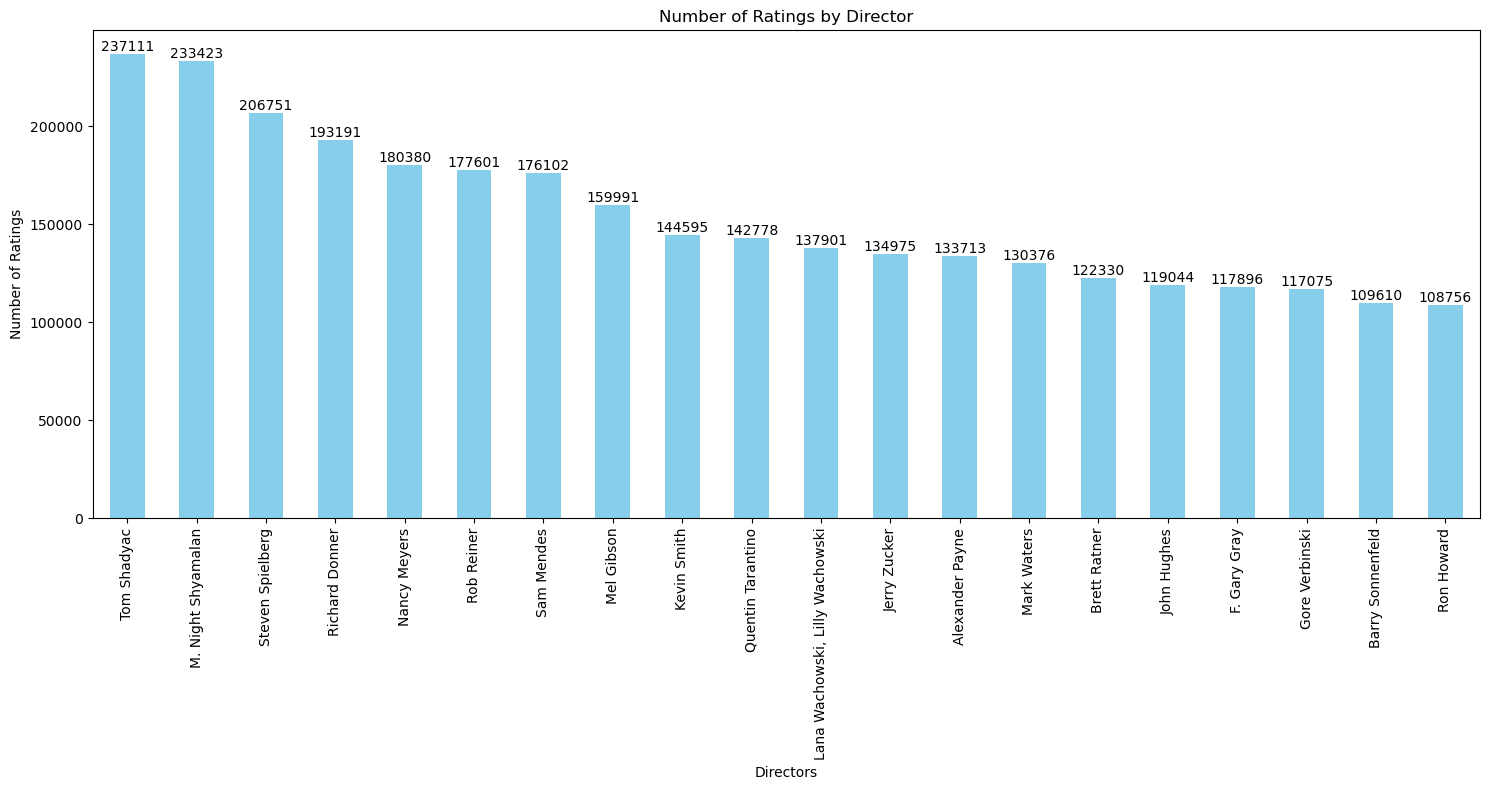

In [52]:
#director
print('Number of directors: '+str(len(director_counts2)))
top_directors = director_counts2.head(20)

g_director = top_directors.plot(kind='bar', title='Number of Ratings by Director', figsize=(15, 8), color='skyblue')

plt.xlabel('Directors')
plt.ylabel('Number of Ratings')

#count
for p in g_director.patches:
    g_director.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',  
        va='bottom'   
    )

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In this dataset, the count for each director is higher but the number of samples is also bigger, thus, no rush conclusion should be taken regarding its relevance.

# Clustering

The goal is to cluster combining year, rating, genres, director, name, and description so that we can identify groups of movies that are similar between eachother. Clustering is a type of unsupervised learning where the algorithm tries to group data points into clusters such that points in the same cluster are more similar to each other than to those in other clusters. Unlike supervised learning, where the model learns from labeled data, clustering does not require labeled outcomes and is used to find inherent patterns or structures in the data.The porcess that we followed was the following.

1) Data Preparation: We began by preparing the movie dataset, which included multiple features such as movie name, description, genre, and director. These features were combined into a single text-based feature, MovieRep, by joining movie names, descriptions, genres, and director names. This combined feature represents the movies as text data, which can then be processed for clustering.
2) Feature Extraction: We transformed the textual data into numerical format using TF-IDF Vectorization. TF-IDF (Term Frequency-Inverse Document Frequency) is a method used to reflect how important a word is to a document in a collection or corpus. By applying this method, we transformed movie descriptions into vectors of numbers that represent the importance of words.
3) Dimensionality Reduction: Since the dataset might be high-dimensional (due to the large vocabulary from TF-IDF), we applied PCA (Principal Component Analysis) to reduce the number of dimensions while preserving as much variance (information) in the data as possible. This helped simplify the clustering process and allowed us to visualize the clusters in lower-dimensional space (2D).
4) Clustering Algorithms: We used K-Means, which is a centroid-based algorithm where the dataset is partitioned into k clusters. The algorithm iteratively assigns each movie to the nearest centroid and updates the centroids to minimize the variance within each cluster. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) was then applied to the data. DBSCAN is a density-based algorithm that can identify clusters of arbitrary shapes and handles outliers (points that do not fit into any cluster) well. We used Euclidean distance to measure similarities between movies and determined the optimal parameters for DBSCAN (like eps and min_samples). We also applied Hierarchical Clustering (Agglomerative method). This method builds clusters by merging the closest points iteratively. We generated a dendrogram to visualize how clusters merged and determined the optimal number of clusters by examining silhouette scores for different values of k. Finally, we used the fcluster function to assign each movie to a specific cluster.
5) Evaluation and Visualization: We evaluated the clustering quality using silhouette scores, which measure how well the movies are clustered. The silhouette score ranges from -1 (poor clustering) to 1 (well-clustered). We visualized the clusters using PCA for dimensionality reduction and plotted the movies on a 2D plane, color-coded by their cluster assignments. This allowed us to visually assess how well the clustering algorithm performed. We also generated word clouds for each cluster to identify the most frequent words in the movie descriptions for each cluster, providing insight into the characteristics of the clusters.


## Text preprocessing

This code performs several steps to preprocess a dataset of movies, aiming to transform text-based data into a clean and structured format suitable for further analysis. The primary focus is on combining movie attributes (Name, description, genres, and director) into a single column, cleaning the text data, and visualizing the most frequent words using a word cloud.

The preprocessing leverages several NLP (Natural Language Processing) techniques:

- Tokenization: Tokenization is the process of breaking down text into individual units, typically words or phrases, referred to as tokens. In this code, the word_tokenize function from NLTK is used to split the text into tokens. This way we can remove words with length 1, which usually are not much useful in knowing the importance of the document. 
- Stop Word Removal: Stop words are high-frequency words such as "the", "is", "and", "in", and "of" that occur frequently in text but add little to no unique meaning. NLTK provides a predefined set of English stop words, which are filtered out in this code during preprocess, which makes the focus shift to terms that are more meaningful and relevant to the context.
- Lemmatization: Lemmatization reduces words to their base or root form using linguistic rules and a dictionary. Unlike stemming, lemmatization ensures that the resulting word is a valid word in the language. For instance, the lemmatizer transforms "running" and "ran" to "run", and "better" to "good". Lemmatization ensures that similar words (e.g., "run", "running") are treated as the same during feature extraction, improving the accuracy of term frequency calculations.
- POS Tagging: Part-of-speech (POS) tagging assigns grammatical labels (e.g., noun, verb, adjective) to words in a sentence. For example, in the sentence "He runs fast," "He" would be tagged as a pronoun, "runs" as a verb, and "fast" as an adverb. The pos_tag function from NLTK is used in the code to tag tokens with their POS labels. The purpose of using it is that Lemmatization’s accuracy depends on knowing the correct POS of a word. For example, "running" is lemmatized to "run" if tagged as a verb but remains unchanged if tagged as a noun.
- Punctuation Removal: Punctuation marks such as !, @, #, and . are removed during preprocessing using string replacement. While punctuation is useful for human understanding, it often adds noise. 
- Numerical Word Conversion: Numbers in text (e.g., "2023", "100") are converted to their word equivalents using the num2words library. This step ensures that numbers are treated as textual tokens and not ignored or misinterpreted.

In [53]:
# We create a copy of the original dataset (movies_df) to avoid modifying the original data..
processed_movies_df = movies_df.copy()
# Display the first few rows to ensure the dataset is correctly loaded
print(processed_movies_df.head())

   Movie_ID  Year                    Name  \
0         3  1997               Character   
1        16  1996               Screamers   
2        18  1994        Immortal Beloved   
3        26  2004         Never Die Alone   
4        30  2003  Something's Gotta Give   

                                         description  rating  \
0  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
1  On the distant mining planet Sirius 6B ravaged...     6.3   
2  The life and death of the legendary Ludwig van...     7.4   
3  A film noir centering around a hard-boiled, st...     5.6   
4  Harry Sanborn is an aged music industry exec w...     6.7   

                                      genres             director  
0            Crime, Drama, Mystery, Thriller        Mike van Diem  
1                   Horror, Sci-Fi, Thriller     Christian Duguay  
2  Biography, Drama, Music, Mystery, Romance         Bernard Rose  
3             Action, Crime, Drama, Thriller  Ernest R. Dickerson  
4   

We merge multiple columns (Name, description, genres, director) into a single string column (MovieRep). We have that this concatenated column represents a textual summary for each movie.

In [54]:
#Join all text variables: name, description, genres, director
processed_movies_df['MovieRep'] = (processed_movies_df['Name'].astype(str) +
                                   ' ' +
                                   processed_movies_df['description'].astype(str) +
                                   ' ' + 
                                   processed_movies_df['genres'].astype(str) + 
                                   ' ' +
                                   processed_movies_df['director'].astype(str))
processed_movies_df['MovieRep'].head()

0    Character In the 20's, in Netherlands, Jacob W...
1    Screamers On the distant mining planet Sirius ...
2    Immortal Beloved The life and death of the leg...
3    Never Die Alone A film noir centering around a...
4    Something's Gotta Give Harry Sanborn is an age...
Name: MovieRep, dtype: object

We map NLTK POS tags (e.g., VB for verbs, NN for nouns) to WordNet POS tags (v for verbs, n for nouns), with the objective of having an accurate lemmatization (POS Tagging).

In [55]:
#Join all text variables: name, description, genres, director
stop_words = set(stopwords.words('english')) #Load English stop words
stemmer = PorterStemmer() # Initialize a stemmer 
lemmatizer = WordNetLemmatizer() # Initializes a Lemmatizer
# Map POS tag to the format required by WordNetLemmatizer
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('V'):
        return 'v'  # Verb
    elif treebank_tag.startswith('N'):
        return 'n'  # Noun
    elif treebank_tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to noun if no match

We clean and transform the combined text data through tokenization, stop word removal, lemmatization, and other steps to make it uniform and analysis-ready.

In [56]:
# Preprocess function
def preprocess(data):
    # Convert text to lowercase
    data = np.char.lower(data)
    # Remove punctuation
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for symbol in symbols:
        data = np.char.replace(data, symbol, ' ')
 
    # Remove apostrophes (before stopword removal)
    data = np.char.replace(data, "'", "")
    data = str(data)

    # Tokenize and remove stop words
    tokens = [word for word in word_tokenize(data) if word not in stop_words and len(word) > 1]

    # Remove single characters
    new_text = " ".join([word for word in tokens if len(word) > 1])
   
    
    # POS tagging
    tagged_tokens = pos_tag(new_text.split())  # Get POS tags for each token

    # Lemmatization: Convert words to their base form
    new_text = " ".join([lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_tokens])
   
    # Convert numbers to words
    new_text = " ".join([num2words(word) if word.isdigit() else word for word in new_text.split()])
 
    return new_text
processed_movies_df['MovieRep'] = processed_movies_df['MovieRep'].apply(preprocess)

In [57]:
processed_movies_df['MovieRep'].head()

0    character twenty netherlands jacob willem kata...
1    screamer distant mine planet sirius 6b ravage ...
2    immortal beloved life death legendary ludwig v...
3    never die alone film noir center around hard b...
4    somethings get ta give harry sanborn age music...
Name: MovieRep, dtype: object

### Text Variables

TF-IDF (Term Frequency-Inverse Document Frequency) is used to convert textual data into numerical vectors. This technique assigns a score to each term based on how important it is within a document relative to the entire dataset. 

- Term Frequency (TF):  measures how often a term (\(t\)) appears in a document (\(d\)) relative to the total number of terms in the document:

$
\text{TF}(t, d) = \frac{\text{Number of occurrences of } t \text{ in } d}{\text{Total number of terms in } d}
$

- Inverse Document Frequency (IDF): measures how unique a term is across the entire corpus. It reduces the weight of common terms that appear in many documents. The formula is:

$
\text{IDF}(t) = \log\left(\frac{N}{1 + \text{DF}(t)}\right)
$

Where:
- $N$: Total number of documents.
- $\text{DF}(t)$: Number of documents containing the term \(t\).
- $1$ is added to the denominator to avoid division by zero.
The TF-IDF score combines these two measures to compute the importance of a term (\(t\)) in a document (\(d\)):

$\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)$
In this case, we configure the TfidfVectorizer with:
- stop_words='english': Removes common English stop words like "and", "is", "the", etc., to focus on meaningful terms.
- min_df=6: Ignores terms that appear in fewer than 6 documents (movies). This filters out rare terms that might add noise without contributing useful information.

The resulting tfidf_matrix is a sparse matrix where:
- Rows represent movies.
- Columns represent terms (words).
- Each cell contains the TF-IDF score of a term for a movie, capturing its importance.

Using min_df ensures that the matrix focuses on terms relevant across multiple documents, improving the model’s ability to identify patterns and reducing dimensionality.the TF-IDF score for a specific term in a specific movie description.



In [58]:
#TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', min_df = 6)  
#each row is a movie and each column a term
tfidf_matrix = tfidf.fit_transform(processed_movies_df['MovieRep'])
tfidf_matrix

<1063x1853 sparse matrix of type '<class 'numpy.float64'>'
	with 38160 stored elements in Compressed Sparse Row format>

## Scaling Numerical Features

Numerical features, such as the year of release (`Year`) and the movie's rating (`rating`), often have different ranges. To ensure these features are comparable and do not dominate one another, we standardize them using StandardScaler. Standardization adjusts the features to have a mean of 0 and a standard deviation of 1. This is particularly important for machine learning models sensitive to feature scaling (e.g., KMeans clustering or similarity calculations).

The result is a matrix (`numerical_features`) where all numerical values are on the same scale.

In [59]:
scaler = StandardScaler()  
numerical_features = scaler.fit_transform(processed_movies_df[['Year', 'rating']])

## Combining Textual and Numerical Features


To leverage both the textual data (from TF-IDF) and the numerical features (`Year` and `rating`), we combine them into a single matrix. This ensures that models can use all available information for analysis.

We use hstack to horizontally stack the tfidf_matrix and the numerical_features. The resulting matrix (final_data) has:
- Text-based features: The first 1,000 columns correspond to TF-IDF scores for terms.
- Numerical features: The last two columns correspond to the scaled `Year` and `rating`.

This unified representation allows for holistic analysis, including clustering, similarity search, or classification tasks.

In [60]:
final_data = hstack([tfidf_matrix, numerical_features])
final_data

<1063x1855 sparse matrix of type '<class 'numpy.float64'>'
	with 40286 stored elements in COOrdinate format>

## Clustering Methods

### K-means

KMeans is a popular unsupervised machine learning algorithm used for clustering. It partitions a dataset into a predefined number of clusters, where each cluster contains similar data points. The goal of KMeans is to minimize the within-cluster variance (WCSS), meaning it tries to make the points within each cluster as close as possible to the cluster's centroid.

#### Dimensionality Reduction because of Sparce Data (PCA)

In this step, we are fitting Principal Component Analysis (PCA) to the data. PCA is a technique used to reduce the dimensionality of a dataset while preserving as much variance (information) as possible. Here, we are applying PCA to the entire dataset (final_data). We are not specifying the number of components yet, so PCA will consider all available components (up to the number of features in the dataset).

- PCA(): Initializes the PCA model without specifying the number of components.
- pca.fit(): Fits the PCA model to the data, i.e., it computes the principal components and their explained variance.
  

In [61]:
# Fit PCA with all components (number of components <= number of features)
pca = PCA()
pca.fit(final_data.toarray())

PCA()

After fitting PCA, we can look at how much variance each principal component captures. This is stored in explained_variance_ratio_, which gives the proportion of variance explained by each component. Each component is ordered by the amount of variance it explains, starting from the highest.

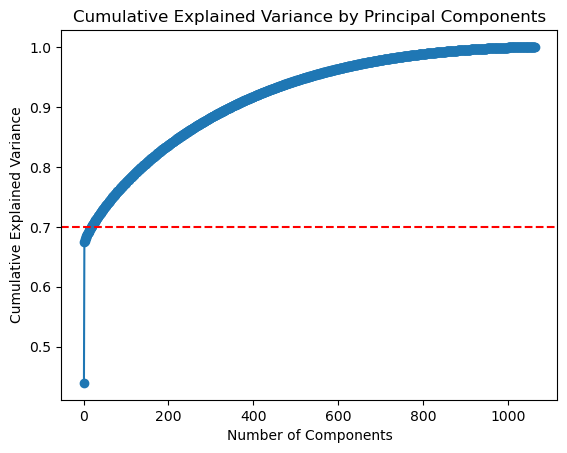

0.7339166348423921


In [62]:
# Plot explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Plot the cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.70, color='r', linestyle='--')  # 90% variance line
plt.show()
print(cumulative_explained_variance[50])


From the plot, we can see the cumulative explained variance across the components. The horizontal line at 70% indicates the threshold for how much of the variance we want to capture.

Now that we have evaluated the explained variance and determined that 50 components explain a sufficient amount of variance, we will reduce the dimensionality of our dataset to 50 components. This will allow us to work with a smaller, more manageable dataset, while retaining the majority of the important information. The result is a reduced dataset (reduced_data) where each data point is represented by only the first 50 principal components instead of the original high-dimensional feature space.

In [63]:
# Reduce to 50 components or a number that works best for your data
pca = PCA(n_components=50)
reduced_data = pca.fit_transform(final_data.toarray())


#### Elbow Method to Find Optimal k (Number of Clusters)

The Elbow Method is a technique used to determine the optimal number of clusters for a clustering algorithm. The goal is to minimize the within-cluster sum of squares (WCSS) or inertia, which measures the compactness of the clusters. The WCSS is calculated for a range of k values (number of clusters), and the point where the decrease in WCSS begins to slow down forms an "elbow" in the plot. This point indicates the optimal number of clusters.

c:\Users\Maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

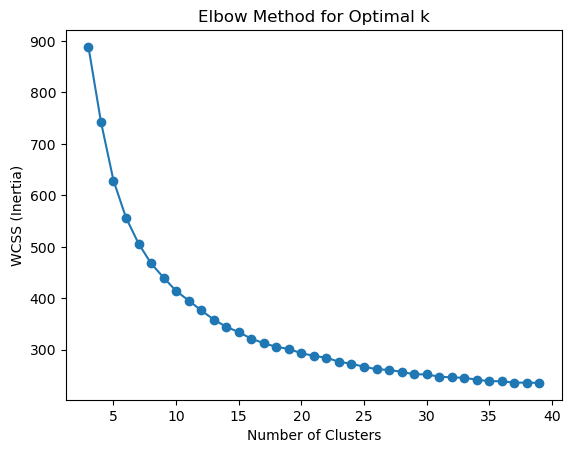

In [64]:
# Range of k values to test
k_range = range(3, 40)
wcss = []
# Fit KMeans for each k and calculate the inertia (WCSS)
for k in k_range:
    kmeans = KMeans(n_clusters=k,  n_init=10, random_state=42)
    kmeans.fit(reduced_data)  
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()


#### Silhouette Score for Different k Values

The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that the points are well-clustered. In this code, we calculate the silhouette score for each k value from 3 to 40 and plot it.

c:\Users\Maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

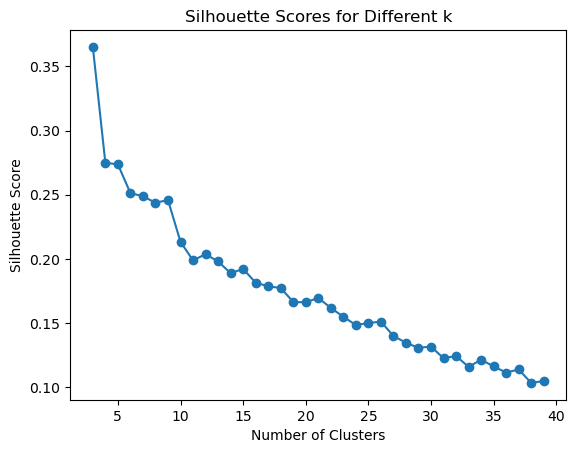

In [65]:
sil_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k,  n_init=10, random_state=42)
    kmeans.fit(reduced_data)  
    labels = kmeans.labels_
    sil_score = silhouette_score(reduced_data, labels)
    sil_scores.append(sil_score)

# Plot silhouette scores
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


####  KMeans Clustering with Chosen k

After evaluating the Elbow Method and Silhouette scores, the Silhouetteuette scores for the clustering results peaked at a maximum of 0.35, suggesting that the clusters formed are not well-separated and may overlap significantly. Also, the Elbow Method did not present a clear "elbow point," where the rate of decrease in inertia significantly change. Thus, We selected k=22 based on understanding of the dataset's characteristics, such as the potential number of distinct groupings (genres) present in the data.

We perform the KMeans clustering with k=22.

In [66]:
k = 22

kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
kmeans.fit(reduced_data) 

labels = kmeans.labels_
# Assign cluster labels to the DataFrame
processed_movies_df['Cluster_K'] = labels

c:\Users\Maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


We calculate and display the silhouette score for this clustering configuration.

In [67]:
score = silhouette_score(reduced_data, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.16189314784567496


#### PCA for Dimensionality Reduction for Visualization


Principal Component Analysis (PCA) is used to reduce the dimensionality of the feature space, making it easier to visualize high-dimensional data. In this case, we reduce threducedal_das) into 2D for visualizationThe process is the following:.

1. We apply PCA to reduce the data to two components.
2. We plot a scatter plot of the movies in the 2D PCA space, color-coded by their cluster labels (`Clusterpace.

The color of each point represents the cluster it belongs to, and the scatter plot gives insight into the structure and separation of the c
lusters.


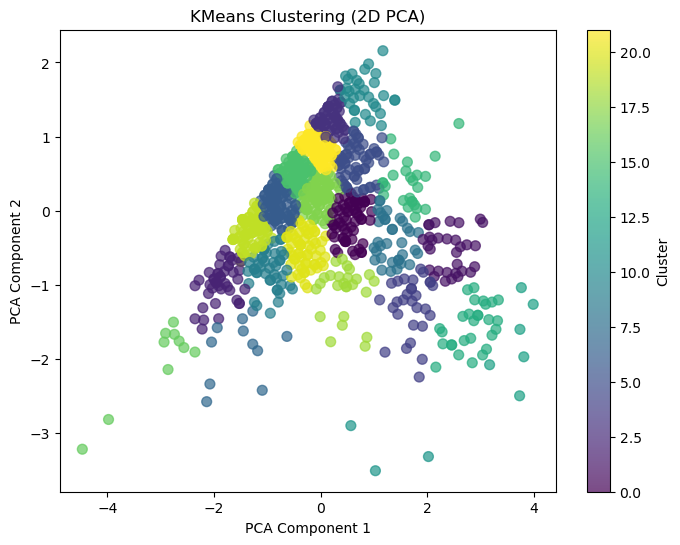

In [68]:
pca_2d = PCA(n_components=2)
reduced_2d_data = pca_2d.fit_transform(reduced_data)  

# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_2d_data[:, 0], reduced_2d_data[:, 1], c=processed_movies_df['Cluster_K'], cmap='viridis', s=50, alpha=0.7)
plt.title('KMeans Clustering (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

After performing KMeans clustering, we obtain centroids for each cluster, which represent the mean position of all points in that cluster. These centroids are important as they help summarize the characteristics of each cluster. To visualize the centroids we reduce the centroid positions to 2D using PCA (so they can be plotted alongside the movies) and we add the centroids as red 'x' markers on the 2D PCA scatter plot. This helps to understand the central tendency of each cluster and how well the clusters are separated.


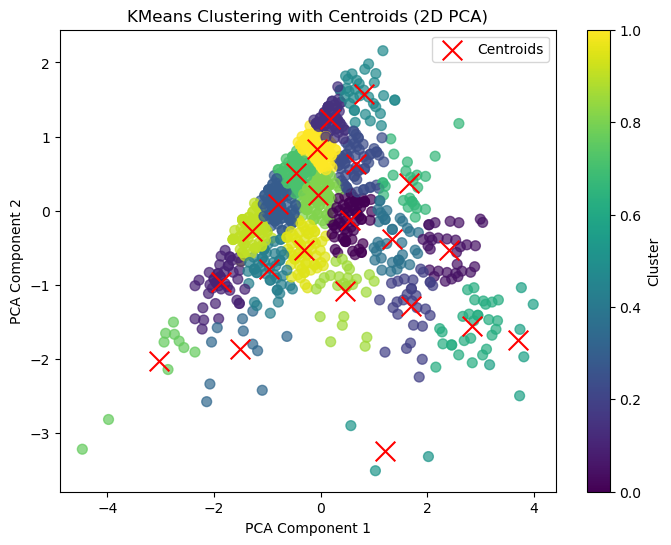

In [69]:
# Plot the cluster centroids on top of the scatter plot
centroids = kmeans.cluster_centers_
reduced_centroids = pca_2d.transform(centroids)  # Project centroids into 2D space for visualization

plt.figure(figsize=(8, 6))
plt.scatter(reduced_2d_data[:, 0], reduced_2d_data[:, 1], c=processed_movies_df['Cluster_K'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('KMeans Clustering with Centroids (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


#### Word Clouds for Each Cluster

Word clouds are a way to visualize the most frequent terms in a set of text data. Each word in the word cloud is sized according to its frequency within the cluster. For each cluster, we extract the movie descriptions belonging to that cluster and create a word cloud for each cluster, where the most frequent words in the cluster's descriptions are displayed in larger font sizes. This allows us to quickly see the dominant themes or topics within each cluster.


C:\Users\Maria\AppData\Local\Temp\ipykernel_6652\1901468707.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 5))


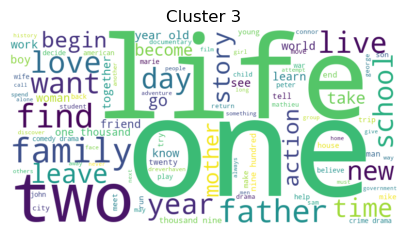

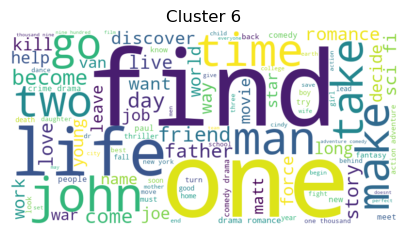

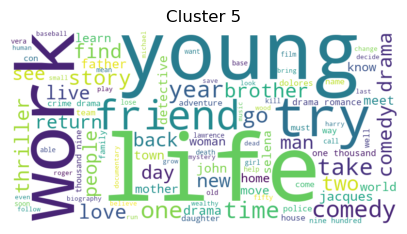

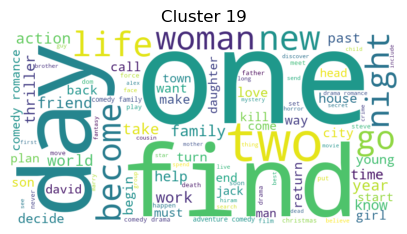

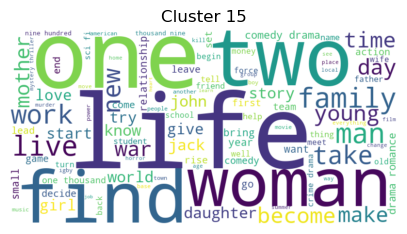

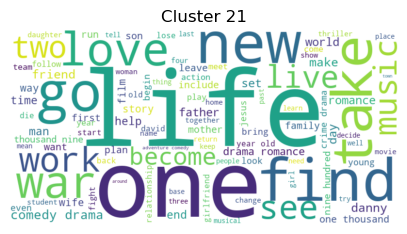

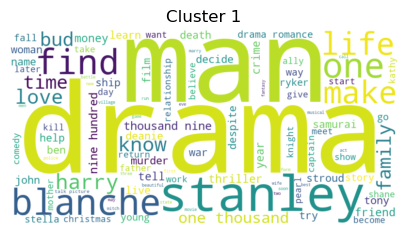

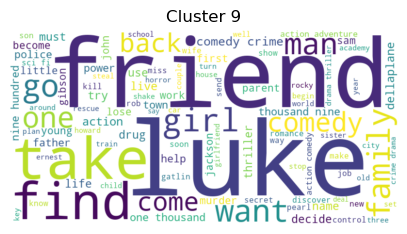

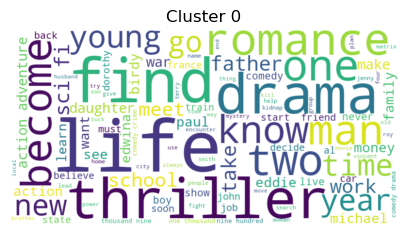

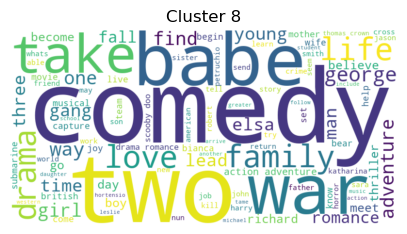

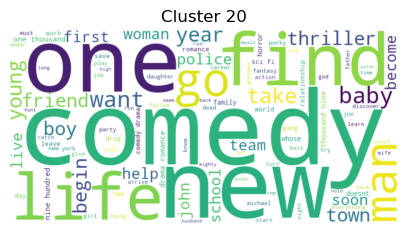

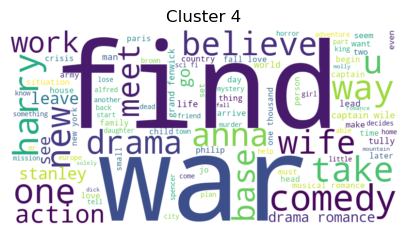

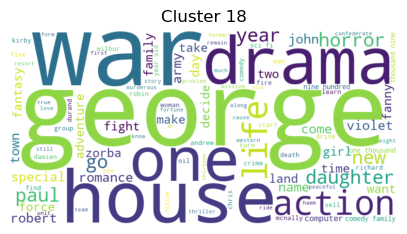

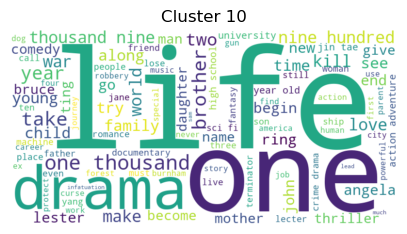

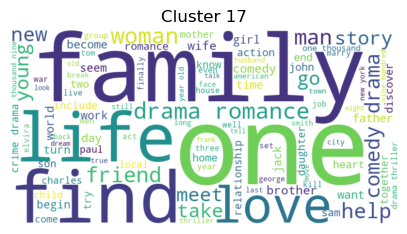

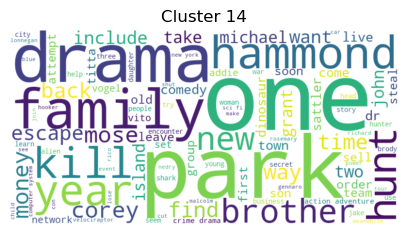

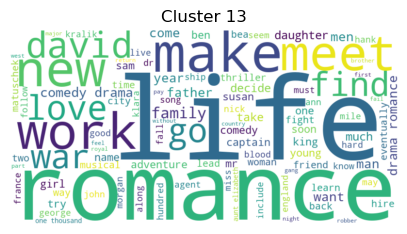

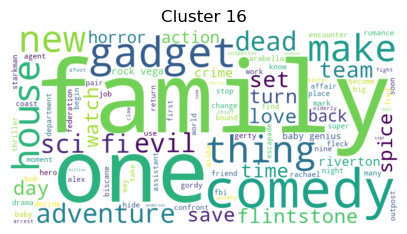

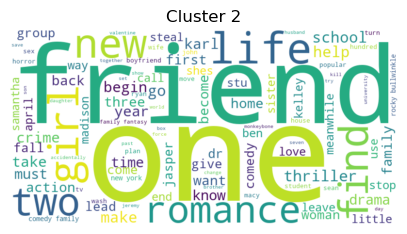

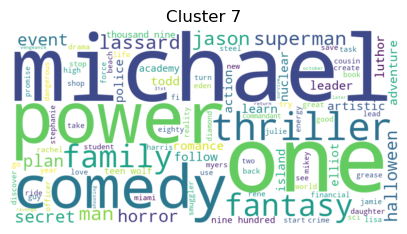

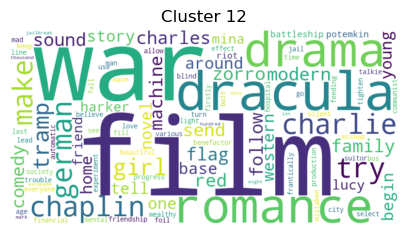

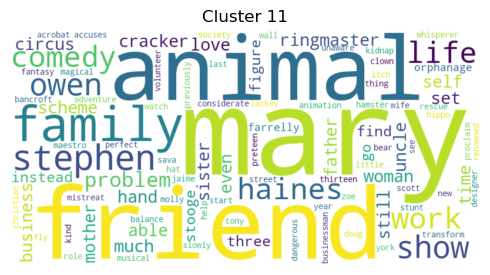

In [70]:
# Create a dictionary where the keys are the cluster labels and values are lists of movie descriptions for each cluster
clustered_data = {}

# Iterate through each cluster label and collect the text data for that cluster
for cluster in processed_movies_df['Cluster_K'].unique():
    # Filter the rows corresponding to the current cluster
    cluster_text = processed_movies_df[processed_movies_df['Cluster_K'] == cluster]['MovieRep'].tolist()
    # Join the list of text data into one long string
    clustered_data[cluster] = " ".join(cluster_text)

# Step 2: Create Word Clouds for Each Cluster
for cluster, text in clustered_data.items(): 
    plt.figure(figsize=(5, 5))
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    
    # Display the word cloud for the current cluster
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()

#### Conclusion
The repetition of the largest words across multiple clusters in the word clouds suggests that the clustering algorithm has not effectively distinguished between the clusters. This could imply overlapping themes in the dataset or that the features used for clustering are not adequately differentiating the data. Improvements in feature engineering, text preprocessing, or exploring alternative clustering algorithms might be necessary to achieve better separation between clusters.

## DBSCAN


DBSCAN is a popular density-based clustering algorithm that groups together points that are closely packed, marking points in low-density regions as outliers (noise). Unlike KMeans, DBSCAN does not require specifying the number of clusters in advance and can identify arbitrarily shaped clusters.

#### Finding Nearest Neighbors for Distance Calculation

To perform DBSCAN clustering, one of the key parameters is eps (epsilon), which defines the radius within which points are considered neighbors. The optimal value of eps is typically determined using a k-distance plot (or elbow plot).
We use NearestNeighbors to find the distances from each point to its nearest neighbors. The number of neighbors k is set to the value of min_samples (5 in this case). This helps in determining the local density around each point.

- NearestNeighbors: This method calculates the distances to the nearest neighbors for each point in the dataset.
- kneighbors: This function returns the distances and indices of the nearest neighbors for each point in the dataset.

We then plot the k-distance graph, which helps in selecting an appropriate eps value.


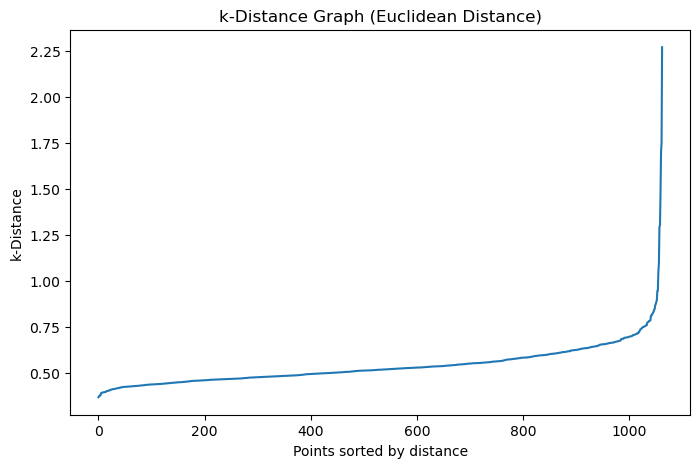

In [71]:
# Use NearestNeighbors to find distances
k = 5  # Set to min_samples
neighbors = NearestNeighbors(n_neighbors=k, metric='euclidean')  # Default Euclidean
neighbors_fit = neighbors.fit(reduced_data)
distances, indices = neighbors.kneighbors(reduced_data)

# Sort distances and plot
distances = np.sort(distances[:, -1])  # Take the kth nearest distance
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("k-Distance Graph (Euclidean Distance)")
plt.xlabel("Points sorted by distance")
plt.ylabel("k-Distance")
plt.show()


#### Choosing the eps Value from the k-Distance Plot

The idea is to look for a point where the distances start to increase significantly, which typically represents the dense core of the clusters. In this code, we manually select eps=0.55 based on the k-distance plot. 

- eps_value = 0.55: This value is chosen based on the k-distance graph, marking the cut-off for forming dense regions (clusters).
- min_samples = 5: This is the minimum number of points required to form a cluster, which is often the same as the number of nearest neighbors used in the distance calculation.

Now we proceed to run DBSCAN with the chosen parameters.


In [72]:
# Choose `eps` from the k-distance plot
eps_value = 0.55 # Replaced with value from plot
min_samples = 5  

# Perform DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples, metric='euclidean')
dbscan_labels = dbscan.fit_predict(reduced_data)

processed_movies_df['Cluster_DB'] = dbscan_labels
print(processed_movies_df['Cluster_DB'].value_counts())


Cluster_DB
 0    824
-1    200
 1     22
 2     11
 3      6
Name: count, dtype: int64


#### Calculating the Silhouette Score

In this section, we compute the Silhouette Score for the DBSCAN clustering results. Note that DBSCAN can label some points as noise (denoted by -1), so we exclude those points before calculating the silhouette score.

- mask = dbscan_labels != -1: Excludes the noise points from the silhouette score calculation.

If there are not enough clusters (only one cluster or all points are noise), the silhouette score is not calculated.

In [73]:
dense_data = reduced_data
# Filter out noise points (-1) for silhouette score calculation
mask = dbscan_labels != -1
filtered_data = dense_data[mask]  # Exclude noise points
filtered_labels = dbscan_labels[mask]

# Compute the silhouette score
if len(set(filtered_labels)) > 1:  # Silhouette requires >1 cluster
    silhouette_avg = silhouette_score(filtered_data, filtered_labels, metric='euclidean')
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Not enough clusters for silhouette score.")


Silhouette Score: 0.3016997034166382


#### PCA for Dimensionality Reduction for Visualization

Since DBSCAN is a density-based clustering algorithm, it can create arbitrarily shaped clusters. To visualize these clusters, we first reduce the data to 2D using Principal Component Analysis (PCA)* This allows us to plot the clusters and see their distribution in a 2D space.


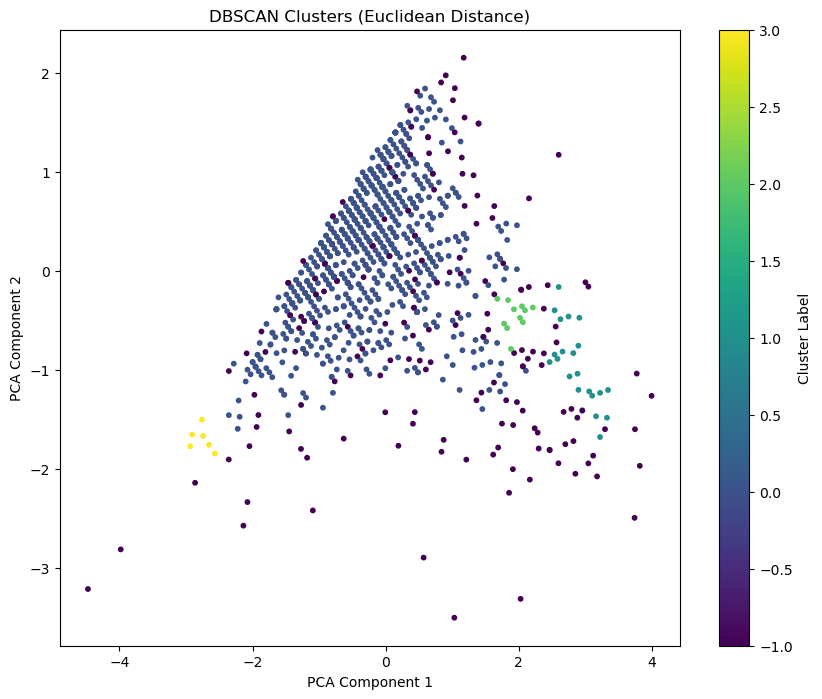

In [74]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(dense_data) 

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title("DBSCAN Clusters (Euclidean Distance)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

#### Word Clouds for Each Cluster

After clustering the movies using DBSCAN, we want to visualize the most frequent words in each cluster. 

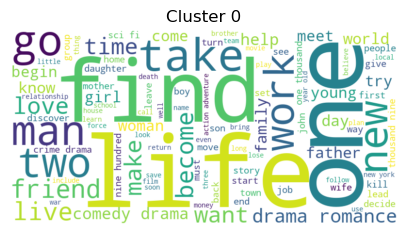

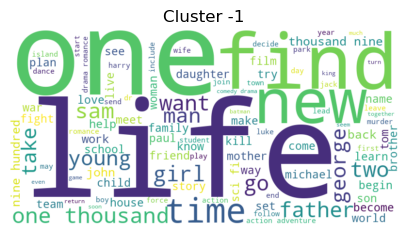

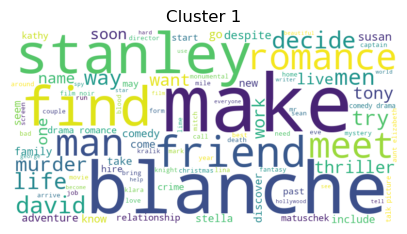

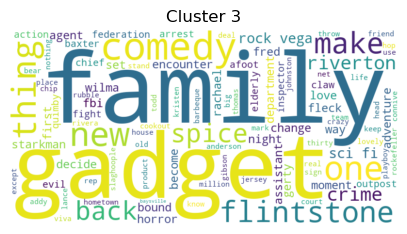

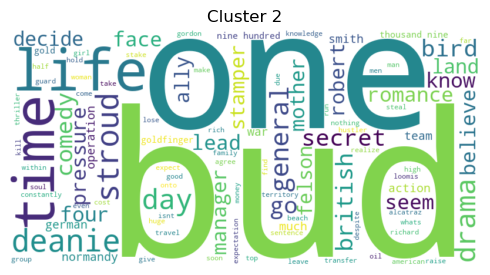

In [75]:
# Step 1: Prepare the Data
# Create a dictionary where the keys are the cluster labels and values are lists of movie descriptions for each cluster
clustered_data = {}

# Iterate through each cluster label and collect the text data for that cluster
for cluster in processed_movies_df['Cluster_DB'].unique():
    # Filter the rows corresponding to the current cluster
    cluster_text = processed_movies_df[processed_movies_df['Cluster_DB'] == cluster]['MovieRep'].tolist()
    # Join the list of text data into one long string
    clustered_data[cluster] = " ".join(cluster_text)

# Create Word Clouds for Each Cluster


for cluster, text in clustered_data.items(): 
    plt.figure(figsize=(5, 5))
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    
    # Display the word cloud for the current cluster
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()

#### Conclusion 

The hierarchical clustering with the chosen parameters (eps_value = 0.55, min_samples = 5) produced a Silhouette Score of 0.43, indicating moderately well-separated clusters. However, the word clouds suggest some overlap between clusters, as common terms like "life" and "find" appear across multiple clusters. This suggests that the clustering could be improved with more refined features or preprocessing.

## Hierarchical Clustering

Hierarchical Clustering is an unsupervised machine learning algorithm used to build a hierarchy of clusters. It does not require the number of clusters to be specified in advance.

#### Compute the Linkage Matrix (Agglomerative Clustering)

Hierarchical clustering can be computed using the linkage function, which calculates the distances between clusters at each step. In this case, we are using the Agglomerative approach (bottom-up), which starts with each data point as its own cluster and merges the closest clusters iteratively. The Ward linkage method minimizes the variance within each cluster when merging clusters. This is the most commonly used method and helps to form compact clusters with similar points.In the following code, we use Euclidean distance to measure the distance between points.


In [76]:
# Compute the Linkage Matrix (Agglomerative Clustering)
# Compute the linkage matrix using the 'ward' method (which minimizes the variance within clusters)
linked = linkage(reduced_data, method='ward')

#### Create and Visualize the Dendrogram

A dendrogram is a tree-like diagram that illustrates the merging process of the hierarchical clustering algorithm. The x-axis represents the data points (movies), while the y-axis represents the Euclidean distance at which clusters are merged. The height at which two clusters merge indicates the similarity between them. The dendrogram helps in selecting the number of clusters (k) by looking for a suitable "cut-off" in the tree, typically where there is a large distance between merges (i.e., no further merging).

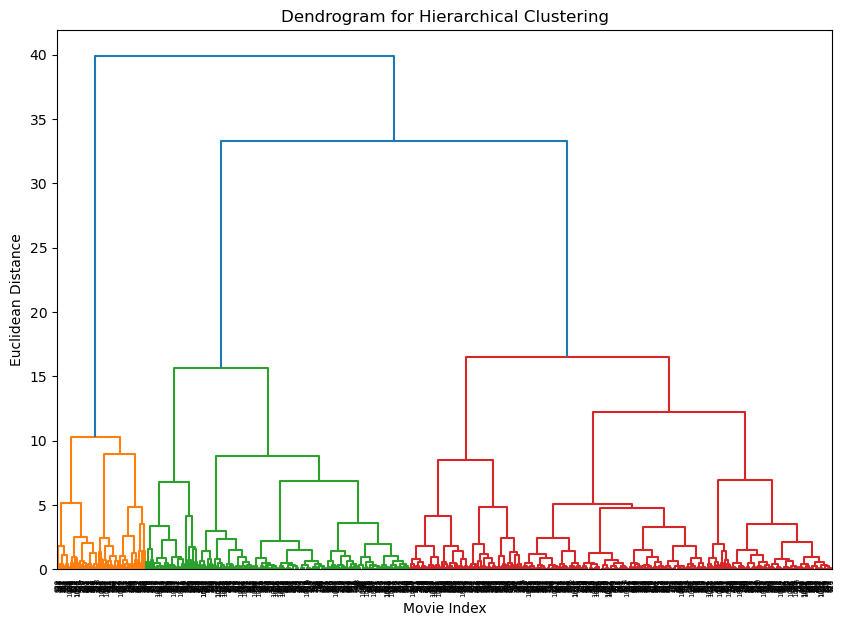

In [77]:
 # Create and Visualize the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Movie Index')
plt.ylabel('Euclidean Distance')
plt.show()

### Test for Different Values of k and Compute Silhouette Score

Next, we evaluate how well the clustering performs for different values of k. To do this, we compute the Silhouette Score for a range of k values. The Silhouette Score measures how similar each point is to its own cluster compared to other clusters.

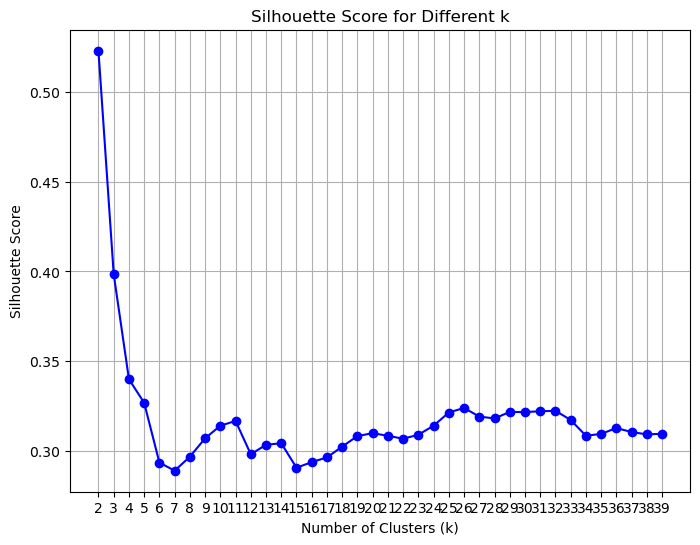

In [78]:
# Test for different values of k and compute Silhouette Score
silhouette_scores = []  # To store the silhouette scores for each k
k_range = range(2, 40)  

for k in k_range:
    labels = fcluster(linked, k, criterion='maxclust')
    
    # Compute Silhouette Score for the current k
    sil_score = silhouette_score(reduced_data, labels)
    silhouette_scores.append(sil_score)

# Plot Silhouette Scores for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#### Determine the Optimal k and Cut the Dendrogram

From the silhouette scores and dendogram, we choose k = 12 . We cut the dendrogram at the chosen k value using the fcluster function. This assigns each data point (movie) to one of the clusters based on the number of clusters defined. After cutting the dendrogram, we store the cluster labels in the DataFrame and evaluate the clustering quality using the silhouette score.


In [79]:
# Use the dendrogram plot to identify the optimal number of clusters by cutting at a specific distance.
n_clusters = 6

# Create Flat Clusters by Cutting the Dendrogram
labels = fcluster(linked, n_clusters, criterion='maxclust')

processed_movies_df['Cluster_H'] = labels

# Evaluate Clustering Quality (Silhouette Score)
sil_score = silhouette_score(reduced_data, labels)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.2934659900342565


#### Visualize the Clusters Using PCA

To visualize the clustering results, we reduce the data to 2D using Principal Component Analysis (PCA).

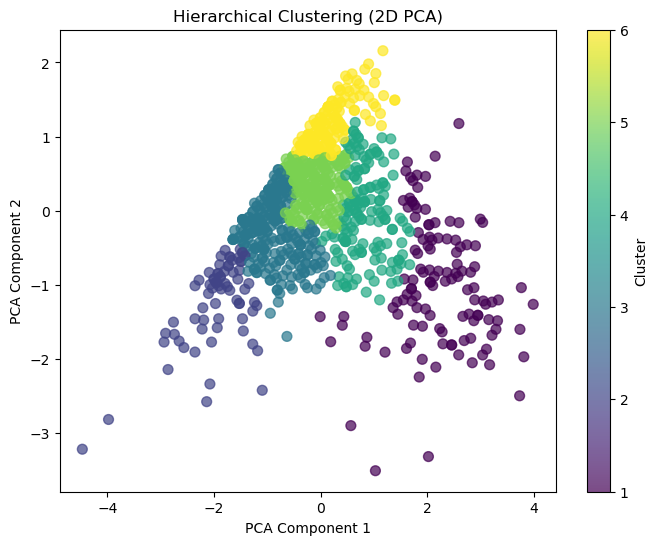

Cluster_H
3    291
5    252
6    172
4    154
1    121
2     73
Name: count, dtype: int64


In [80]:
# Visualize the Clusters
pca_2d = PCA(n_components=2)
reduced_2d_data = pca_2d.fit_transform(reduced_data) 

# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_2d_data[:, 0], reduced_2d_data[:, 1], c=processed_movies_df['Cluster_H'], cmap='viridis', s=50, alpha=0.7)
plt.title('Hierarchical Clustering (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


print(processed_movies_df['Cluster_H'].value_counts())


#### Word Clouds for Each Cluster

After clustering the movies using DBSCAN, we want to visualize the most frequent words in each cluster. 

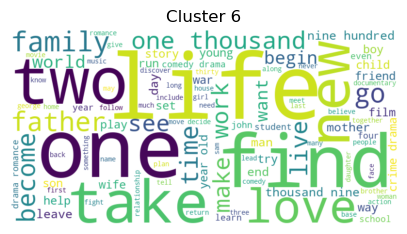

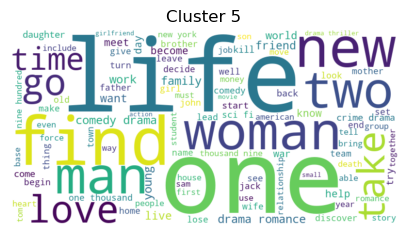

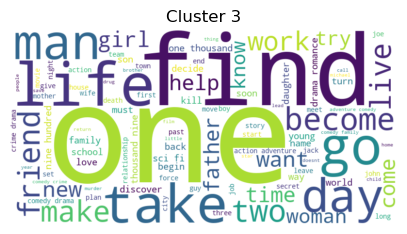

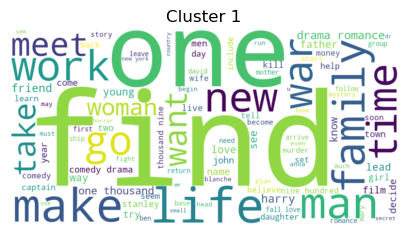

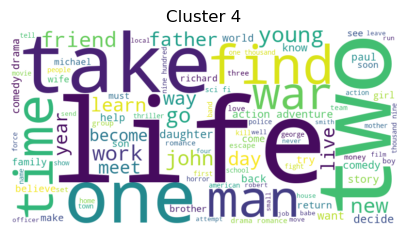

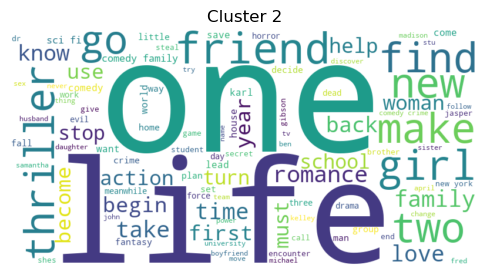

In [81]:
# Step 1: Prepare the Data
# Create a dictionary where the keys are the cluster labels and values are lists of movie descriptions for each cluster
clustered_data = {}

# Iterate through each cluster label and collect the text data for that cluster
for cluster in processed_movies_df['Cluster_H'].unique():
    # Filter the rows corresponding to the current cluster
    cluster_text = processed_movies_df[processed_movies_df['Cluster_H'] == cluster]['MovieRep'].tolist()
    # Join the list of text data into one long string
    clustered_data[cluster] = " ".join(cluster_text)

# Step 2: Create Word Clouds for Each Cluster


for cluster, text in clustered_data.items(): 
    plt.figure(figsize=(5, 5))
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    
    # Display the word cloud for the current cluster
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()


#### Conclusion
Again, same that happened with K-means, the repetition of the largest words across multiple clusters in the word clouds suggests that the clustering algorithm has not effectively distinguished between the clusters. This could imply overlapping themes in the dataset or that the features used for clustering are not adequately differentiating the data. Improvements in feature engineering, text preprocessing, or exploring alternative clustering algorithms might be necessary to achieve better separation between clusters.

# Apriori Algorithm and Association Rules

The Apriori Algorithm is used to discover frequent itemsets and to generate association rules. It follows the Apriori principle that if an itemset is not frequent, its subsets will also not be frequent. To apply the algorithm, the variables 'User_ID', 'Movie_ID' and 'Rating' were selected from the df_combined_left dataset. Only ratings above three were filtered so that we can compute association rules for movies liked by the users.

In [82]:
processed_movies_df=df_combined_left.copy()

In [83]:
#Get clean data and select ratings above 3
dataset=processed_movies_df[processed_movies_df['Rating'] > 3]
dataset=dataset[['User_ID','Movie_ID']]
dataset=dataset.drop_duplicates()
dataset=dataset.reset_index(drop=True)
dataset

User_ID  Movie_ID
0         712664         3
1        1331154         3
2          44937         3
3         656399         3
4        2031561         3
...          ...       ...
9671166   196584      4496
9671167    15737      4496
9671168   823628      4496
9671169  1055714      4496
9671170  2643029      4496

[9671171 rows x 2 columns]

## Apriori algorithm implementation by hand

Firstly, we implemented the algorithm by hand. A hashtable for the movies ID was created with movie id as the index and the corresponding hash code as the value. Then, the movies were grouped by users into baskets so that each basket corresponds to all the movies rated by a same user. The occurences of the movies in the baskets were calculated and then filtered with a support of 0.2, finding 80 frequent items. A new hashtable was built for these frequent items. Further ahead, we counted the occurence of pairs of frequent items to find frequent pairs of items. A sparse matrix was used for this purpose since it is more memory efficient to handle many zero entries. The number of frequent pairs found was 215

In [84]:
from scipy.sparse import lil_matrix
from itertools import combinations
from collections import defaultdict
from collections import Counter

In [85]:
#Create a hash table for all the movies
unique_movies=dataset['Movie_ID'].unique()
movie_htable = pd.DataFrame({'movie_id': unique_movies})
movie_htable['hashcode'] = range(len(unique_movies))
movie_htable=movie_htable.set_index('movie_id')['hashcode']
movie_htable

movie_id
3          0
8          1
16         2
17         3
18         4
        ... 
4488    1345
4490    1346
4492    1347
4493    1348
4496    1349
Name: hashcode, Length: 1350, dtype: int64

In [86]:
#Create baskets by users
baskets = dataset.groupby('User_ID')['Movie_ID'].apply(list).to_list()

#Get all the movies from the baskets
all_items = [item for sublist in baskets for item in sublist]

#Convert movie id to hashcode and count the unique hashcodes in all baskets
hashcodes = movie_htable[all_items].values
unique_hashcodes, counts = np.unique(hashcodes, return_counts=True)

no_unique_movies=dataset['Movie_ID'].nunique()
count_item1 = np.zeros((no_unique_movies, 1), dtype=int)
counts = counts.reshape(-1, 1)
count_item1[unique_hashcodes] = counts
count_item1

array([[ 923],
       [3917],
       [ 802],
       ...,
       [1561],
       [1860],
       [5173]])

In [87]:
#Find frequent items with support 0.2
support=0.2
total_baskets=len(baskets) #143441
threshold=support*total_baskets
freq1=np.where(count_item1>threshold)[0].tolist()

#Convert frequent items to movie id
freq1_movID = unique_movies[freq1].tolist()
len(freq1_movID)

80

In [88]:
#Create new hash table only for frequent items
freq1_htable={movie_id: hashcode for hashcode, movie_id in enumerate(freq1_movID)}

In [89]:
#Convert the frequent items to a set for performing purposes
frequent_items=set(freq1_movID)

#Sparse matrix to count frequent itemsets
count_item2 = lil_matrix((len(frequent_items) + 1, len(frequent_items) + 1))

for basket in baskets:
    #Filter and hash
    cand_list = [freq1_htable[item] for item in basket if item in frequent_items]
    if len(cand_list) < 2:
        continue

    #Pairs and counts
    for item1, item2 in combinations(cand_list, 2):
        count_item2[max(item1, item2), min(item1, item2)] += 1

In [90]:
#From sparse matrix to coordinates
count_item2_coo = count_item2.tocoo()

frequent_pairs = []

#Iterate non zero entries in the sparse matrix
for i, j, count in zip(count_item2_coo.row, count_item2_coo.col, count_item2_coo.data):
    if count >= threshold:
        #From hashcodes back to movie id
        item1 = [k for k, v in freq1_htable.items() if v == i][0]
        item2 = [k for k, v in freq1_htable.items() if v == j][0]
        
        #Add pair and count
        frequent_pairs.append(((item1, item2), count))

len(frequent_pairs)

215

## Apriori algorithm and association rules with mlxtend

To increase efficiency, mlxtend was used to find frequent itemsets and association rules. To apply the apriori function it was necessary to one hot encod the dataset. After the algorithm computed the frequent itemsets, we checked that the manual implementation provided the same results, which was verified since the apriori function found 80 frequent pairs and 215 frequent pairs for a threshold of 0.2. 
To evaluate the association rules, we filtered them by support, lift and confidence. The lift was always set as higher than 1 to find associations that were more probable than chance. The minimum support varied between 0.15 and 0.4 and the confidence as higher than 0.6 or higher than 0.7, and the results can be seen in the report. The association rules allow us to, from a movie fictionally rated by user, get a recommendation.

In [91]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [95]:
#One hot enconde the baskets
te = TransactionEncoder()
one_hot = te.fit_transform(baskets)
dataset_encoded = pd.DataFrame(one_hot, columns=te.columns_)

#Check if manual implementation got the same results
frequent_itemsets_check = apriori(dataset_encoded, min_support=0.2, use_colnames=True)
frequent_itemsets_check['itemset_length'] = frequent_itemsets_check['itemsets'].apply(len)
num_frequent_items = len(frequent_itemsets_check[frequent_itemsets_check['itemset_length'] == 1])
print(f"Number of frequent items: {num_frequent_items}")
num_frequent_pairs = len(frequent_itemsets_check[frequent_itemsets_check['itemset_length'] == 2])
print(f"Number of frequent pairs: {num_frequent_pairs}")

Number of frequent items: 80
Number of frequent pairs: 215


In [96]:
#Apply the apriori algorithm
frequent_itemsets = apriori(dataset_encoded, min_support=0.35, use_colnames=True)
len(frequent_itemsets)

34

In [97]:
#Get association rules from the frequent itemsets
rules = association_rules(frequent_itemsets,metric="lift", min_threshold=1.3)
rules

antecedents consequents  antecedent support  consequent support  support  \
0      (3962)      (3938)            0.573323            0.499209  0.37345   
1      (3938)      (3962)            0.499209            0.573323  0.37345   

   confidence     lift  leverage  conviction  zhangs_metric  
0    0.651378  1.30482  0.087242    1.436487       0.547512  
1    0.748083  1.30482  0.087242    1.693723       0.466484

In [98]:
filter_rules = rules[(rules['confidence'] >= 0.7)]
filter_rules

antecedents consequents  antecedent support  consequent support  support  \
1      (3938)      (3962)            0.499209            0.573323  0.37345   

   confidence     lift  leverage  conviction  zhangs_metric  
1    0.748083  1.30482  0.087242    1.693723       0.466484

In [99]:
#Item user has rated
user_items = {3938}

#Find a recommendation
recommendations = filter_rules[filter_rules['antecedents'].apply(lambda x: user_items.issubset(x))]
rec=recommendations['consequents']
number=rec.iloc[0]
number=next(iter(number))
movie_name = movies[movies['Movie_ID'] == number]['Name'].values[0]
movie_name

'Finding Nemo (Widescreen)'

## Conclusion



The implementation by hand could correctly identify frequent items and pairs of items, although for longer itemsets it is not an efficient approach. Changing to the automatic implementation, the results were fairly good. The algorithm could generate a few association rules for a threshold of 0.4 which means that these itemsets are present in 40% of the baskets, seeming to be statistically relevant rules. The lift higher than one and confidence higher than 0.6 also confirm that these rules have some quality and could find similar items in a dataset. The main drawback of this approach is that it does not identify rare itemsets that may be important.

# User-Based Collaborative Filtering

User-Based Collaborative Filtering (UBCF) is a widespread recommendation technique that predicts a user's preferences by analyzing and identifying the behavior of users who are similar to them. The logic behind this method is that "users who have previously agreed will continue to agree."

##  Load and Prepare the Data

In order to develop a user-item matrix, we will use the df_combined_left dataset.

In [101]:
df_combined_left.head()

User_ID  Rating  Movie_ID    Year       Name  \
0   712664       5         3  1997.0  Character   
1  1331154       4         3  1997.0  Character   
2  2632461       3         3  1997.0  Character   
3    44937       5         3  1997.0  Character   
4   656399       4         3  1997.0  Character   

                                         description  rating  \
0  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
1  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
2  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
3  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   
4  In the 20's, in Netherlands, Jacob Willem Kata...     7.7   

                            genres       director  
0  Crime, Drama, Mystery, Thriller  Mike van Diem  
1  Crime, Drama, Mystery, Thriller  Mike van Diem  
2  Crime, Drama, Mystery, Thriller  Mike van Diem  
3  Crime, Drama, Mystery, Thriller  Mike van Diem  
4  Crime, Drama, Mystery, Thriller  Mike van Diem

With each row representing a user's rating for a particular movie. The key columns are `User_ID`, `Rating`, and `Movie_ID` which are essential for creating the collaborative filtering system. Additional metadata like `Name`, `genres`, `description` and `director` are there to enrich the data with valuable insights

## Create User-Item Matrix
After having our dataset determined, we then transformed it into a user-movie matrix that includes the relationship between users (in each row), movies (in each column) and their rating (in each cell). In this way we can examine user behavvior between every movie and predict preferences based on this matrix by using collaborative filtering.

 By using Pandas' pivot_table function, we generated the user-movie matrix from the dataframe we had. User_ID is set as the index, Movie_ID is the column and the ratings are the values as we mentioned above. We also need to mention that it is obvisouly normal that most of the users, if not all, havent rated all the movies of our dataset. In such cases, which are likely the majority, we have assigned a rating of 0.

In [102]:
# Create the user-item matrix
user_item_matrix = df_combined_left.pivot_table(
    index='User_ID', columns='Movie_ID', values='Rating', fill_value=0
)
 
# Preview the matrix
print(user_item_matrix.head())

Movie_ID  3     8     16    17    18    26    28    30    32    33    ...  \
User_ID                                                               ...   
6          0.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0  ...   
7          0.0   5.0   0.0   0.0   0.0   0.0   4.0   5.0   0.0   0.0  ...   
79         0.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0  ...   
97         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
134        0.0   0.0   0.0   0.0   0.0   0.0   5.0   0.0   0.0   0.0  ...   

Movie_ID  4472  4474  4478  4479  4485  4488  4490  4492  4493  4496  
User_ID                                                               
6          3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7          3.0   0.0   0.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0  
79         4.0   0.0   0.0   0.0   0.0   0.0   4.0   0.0   0.0   0.0  
97         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
134        0.0   0.0   0.0   0.0  

As we can see in the matrix above there are a lot of '0' ratings as expected, that most users haven't seen and rated the majority of the movies. To preserve the data's structure, these '0' values were left untouched in the matrix rather than being explicitly removed or altered. This decision preserves the matrix's integrity and makes sure that every correlation that comes out of this matrix will be based on real data and not artificial or altered data.

## Compute User-User Similarity

The most common technique applying collaborative filtering-based recommendation system is User-User Similarity. By measuring similarity based on interactions with objects (in our case rating) the system can suggest items that similar users like through this similarity metric, which ultimately calculates how different users have similar choices (ratings).
In our implementation, we calculated this similarity between users by applying cosine similarity into our matrix. The fact that cosine similarity concentrates on the angle between vectors rather than their magnitude, makes it ideal for sparse matrices like ours with incomplete user interaction data.

In [103]:
# Calculate the size of the user-item matrix
num_users = user_item_matrix.shape[0]  # Number of rows (users)
num_movies = user_item_matrix.shape[1]  # Number of columns (movies)

# Print the dimensions
print(f"Original user-item matrix size: {num_users}x{num_movies}")


Original user-item matrix size: 143458x1350


Because the user-item matrix contains 143,458 users and 1,350 movies, calculating pairwise similarities for every user is computationally and memory-expensive. We will significantly reduce the computational burden and concentrate on a reasonable part of the dataset by choosing a subset of 1,500 people and the corresponding movies, while keeping a representative selection for similarity computations. This method guarantees effectiveness without compromising the overall analysis.
For furthermore optimal processing and memory use, the user-item subset will be converted to a sparse matrix using `csr_matrix`. By storing only the non-zero items in a sparse matrix format, we will drastically lower the memory footprint and boost the effectiveness of following process of calculating similarities. 


In [104]:
# Select a subset of users and movies
subset_size = 1500 
user_item_subset = user_item_matrix.iloc[:subset_size, :subset_size]

# Convert the subset to a sparse matrix (remove 0s)
user_item_sparse_subset = csr_matrix(user_item_subset)

# Compute sparse cosine similarity for the subset
print(f"Calculating user-user cosine similarity for {subset_size} users...")
user_similarity_sparse_subset = cosine_similarity(user_item_sparse_subset, dense_output=False)

# Display non-zero similarity entries for the first 5 users in the subset
print("Non-zero similarity entries for the first 5 users in the subset:")
for i in range(min(5, subset_size)):  # Loop through the first 5 users
    similar_users = user_similarity_sparse_subset[i].nonzero()[1]  # Get indices of non-zero entries
    similarities = user_similarity_sparse_subset[i, similar_users].toarray().flatten()  # Get similarity values
    print(f"User {i} -> Similar users: {list(zip(similar_users, similarities))}")

Calculating user-user cosine similarity for 1500 users...
Non-zero similarity entries for the first 5 users in the subset:
User 0 -> Similar users: [(1314, 0.0760945987307447), (443, 0.07029163884475384), (1160, 0.10831010848186995), (433, 0.08585480120788057), (259, 0.028733909026739834), (934, 0.08909980513686266), (1253, 0.08905016514537414), (1017, 0.2782585286497161), (334, 0.26777106615043333), (1483, 0.23308583784028816), (1195, 0.2706412274473782), (859, 0.2255354885040387), (413, 0.10988593195703084), (1313, 0.22278217335696934), (1041, 0.1892326032926261), (532, 0.24063224962571106), (441, 0.2886873610387661), (426, 0.19565049977087676), (869, 0.2878231774508647), (718, 0.09998326490971922), (75, 0.21578876107459258), (784, 0.27062628037906805), (645, 0.21945593323053508), (542, 0.3400429452455299), (1043, 0.1921228235404774), (728, 0.15949550570782037), (466, 0.3063606686653753), (914, 0.2774104889501611), (263, 0.2087242573583371), (110, 0.198741200538272), (1398, 0.1510982

To facilitate the interpretation, manipulation, and access of similarity values in a structured format, we will first transformed the similarity sparse matrix into a dense matrix and then into a DataFrame. Dense matrices and DataFrames offer more flexibility for activities like visualization and indexing, enabling us to directly inspect and evaluate certain user-user similarity values.

In [105]:
# Convert the similarity sparse matrix to a dense matrix
user_similarity_dense_subset = user_similarity_sparse_subset.toarray()

# Convert it to a DataFrame for easier access
user_similarity_df = pd.DataFrame(
    user_similarity_dense_subset, 
    index=user_item_subset.index, 
    columns=user_item_subset.index
)

# Preview the similarity matrix
print(user_similarity_df.head())

User_ID     6         7         79        97        134       169       183    \
User_ID                                                                         
6        1.000000  0.471805  0.376372  0.238532  0.412934  0.395744  0.340133   
7        0.471805  1.000000  0.507040  0.375501  0.417879  0.451351  0.337143   
79       0.376372  0.507040  1.000000  0.324374  0.388891  0.368176  0.350906   
97       0.238532  0.375501  0.324374  1.000000  0.253147  0.349303  0.292983   
134      0.412934  0.417879  0.388891  0.253147  1.000000  0.373697  0.224504   

User_ID     188       195       199    ...     27585     27597     27608  \
User_ID                                ...                                 
6        0.454909  0.435243  0.423256  ...  0.304289  0.258811  0.400163   
7        0.449315  0.408444  0.441626  ...  0.338057  0.286091  0.375962   
79       0.416392  0.320389  0.357769  ...  0.272790  0.249993  0.359245   
97       0.250154  0.241827  0.203235  ...  0.230875

Pairwise cosine similarity values between users are shown in the resulting DataFrame; a diagonal of 1.0 denotes perfect self-similarity. Similarity scores between users, which range from 0 to 1, are represented by non-diagonal entries. Stronger resemblance is indicated by higher numbers like 0.5-0.6 , whilst weaker similarity is shown by lower values around 0.1-0.2. This dense representation enables us to understand and visualise the relationship between users in the subset intuitively and also provides a basis for additional recommendations and suggestions.

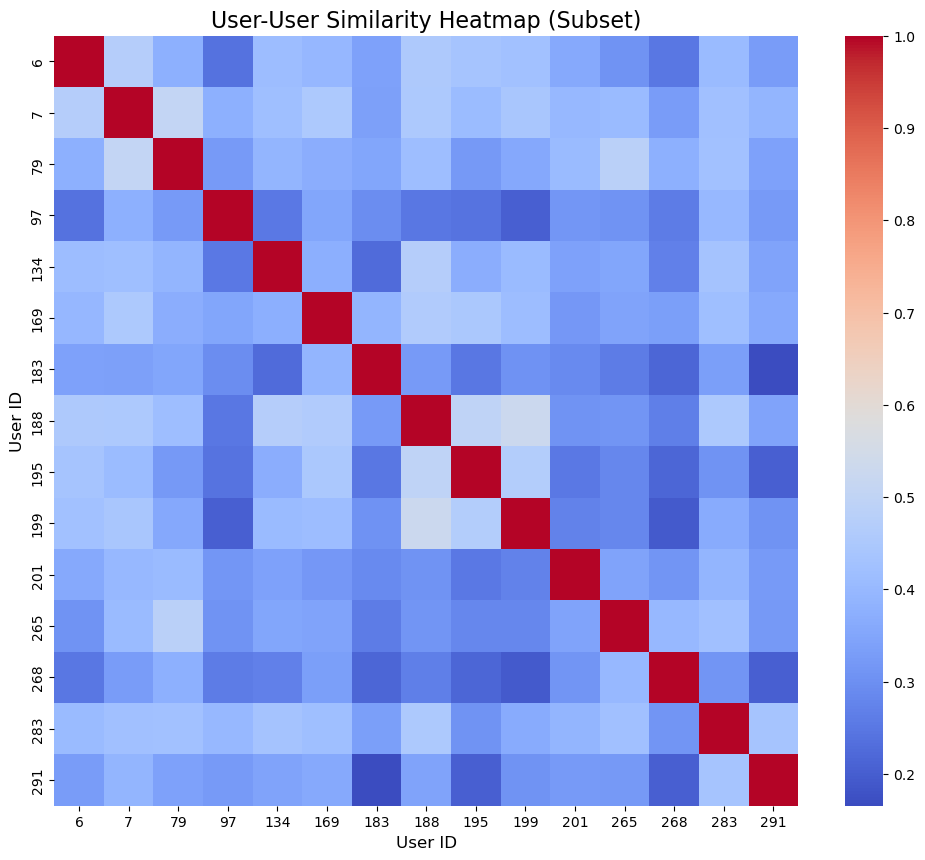

In [106]:
# Select a subset of the similarity matrix for visualization
user_subset = 15
user_similarity_subset = user_similarity_df.iloc[:user_subset, :user_subset]

# Plot the heatmap for the subset
plt.figure(figsize=(12, 10))
sns.heatmap(
    user_similarity_subset, 
    cmap='coolwarm', 
    xticklabels=True, 
    yticklabels=True, 
    cbar=True
)
plt.title('User-User Similarity Heatmap (Subset)', fontsize=16)
plt.xlabel('User ID', fontsize=12)
plt.ylabel('User ID', fontsize=12)
plt.show()


## Create Recommendation and Evaluation Functions

By using the available data, recommendation systems seek to anticipate user preferences and offer tailored recommendations. As we have already mentioned, user-based collaborative filtering predicts a target user's interest in an item by identifying users who share similar interests by using their ratings. To produce precise recommendations, this procedure has weighting inputs from comparable users, and normalizing the outcomes. There are plenty of metrics to try and calculate the outcome, we chose a suitable one like Mean Squared Error (MSE) to compare these predictions to real user feedback in order to determine how accurate they are. The foundation of developing and testing a recommendation system is made up of recommendation and evaluation functions, which work together to provide trustworthy recommendations.

In [107]:
def predict_rating(user_id, movie_id, user_item_matrix, user_similarity_df):
    # Predict the rating for a given user and movie using user-based collaborative filtering.
    # Get similarity scores for the user with all other users
    user_similarities = user_similarity_df[user_id]
    
    # Get ratings for the specific movie by all users
    movie_ratings = user_item_matrix[movie_id]
    
    # Filter out users who haven't rated the movie (ratings == 0)
    relevant_users = movie_ratings[movie_ratings > 0].index
    
    # Compute the weighted average of ratings
    weights = user_similarities[relevant_users]
    ratings = movie_ratings[relevant_users]
    weighted_sum = np.dot(weights, ratings)
    normalization = np.sum(np.abs(weights))
    
    # Return the predicted rating
    return weighted_sum / normalization if normalization > 0 else 0

Using the precomputed user similarity matrix, the predict_rating function first obtains the similarity scores between the target user and every other user. After that, it gathers user ratings for the designated film from every user in the user-item matrix and eliminates users who haven't left a rating (even though we created the sparse matrix). The function calculates a weighted average using the ratings of users, with the weights being the relevant individuals' similarity scores. To make sure the prediction is appropriately scaled, the outcome is normalized by the total of the absolute values of the similarity scores. The function returns a predicted rating of 0 if there are no relevant users (that is, no one has rated the film). 

In [108]:
def recommend_movies(user_id, user_item_matrix, user_similarity_df, num_recommendations=5):
    # Recommend top N movies for a given user.
    # Get movies the user has not rated
    unrated_movies = user_item_matrix.columns[user_item_matrix.loc[user_id] == 0]
    
    # Predict ratings for all unrated movies
    predicted_ratings = {movie: predict_rating(user_id, movie, user_item_matrix, user_similarity_df) for movie in unrated_movies}
    
    # Sort by predicted ratings in descending order
    recommended_movies = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:num_recommendations]
    
    return recommended_movies

The `recommend_movies` function develops personalized movie recommendations for a specific user. Starting by identifying movies the user has not yet rated, it then predicts their potential ratings using the `predict_rating` function. After that, the function prioritizes films with the greatest projected ratings by sorting the predicted ratings for all unrated films in descending order. The top N suggestions are then chosen (by default, N = 5), and they are returned as a list of movie IDs and their estimated ratings. 

In [109]:
def evaluate_model(user_item_matrix, user_similarity_df):
    # Evaluate the collaborative filtering model using RMSE.
    actual_ratings = []
    predicted_ratings = []
    
    for user_id in user_item_matrix.index:
        for movie_id in user_item_matrix.columns:
            if user_item_matrix.loc[user_id, movie_id] > 0:  # Only consider rated movies
                actual_ratings.append(user_item_matrix.loc[user_id, movie_id])
                predicted_ratings.append(predict_rating(user_id, movie_id, user_item_matrix, user_similarity_df))
    
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    return rmse

The `evaluate_model` function evaluates the collaborative filtering model's performance, by computing the Root Mean Squared Error (RMSE), a commonly used metric for comparing the accuracy of projected ratings to actual ratings. Only entries where a user has given a movie a rating (ratings > 0) are chosen when it iterates across all users and films in the user-item matrix. The function uses the `predict_rating` function to calculate the predicted rating for each rated film after storing the actual rating. The RMSE, which measures the average prediction error, is then computed using these numbers; lower values denote more model accuracy. 

### Generate Recommendations

One of the main elements of a collaborative filtering-based recommendation system is the recommendation generation process. The system finds movies that a user hasn't evaluated yet and forecasts their possible ratings by using the similarity scores that users have calculated. These predictions guarantee customized and applicable recommendations because they are based on the interests of users who are similar to you. By unifying unprocessed data and useful insights, this stage allows the recommendation engine to offer personalized suggestions that suit user preferences.

In [110]:
# Generate recommendations for a specific user in the subset
recommendations_subset = recommend_movies(79, user_item_subset, user_similarity_df)

# Print the recommendations for the subset
print("Top recommendations for User 79 (subset):")
for movie_id, predicted_rating in recommendations_subset:
    print(f"Movie ID: {movie_id}, Predicted Rating: {predicted_rating:.2f}")


Top recommendations for User 79 (subset):
Movie ID: 3456, Predicted Rating: 4.80
Movie ID: 1947, Predicted Rating: 4.75
Movie ID: 3444, Predicted Rating: 4.68
Movie ID: 3005, Predicted Rating: 4.64
Movie ID: 4238, Predicted Rating: 4.64


Within the subset of the user-item matrix, this code snippet creates customized movie recommendations for a particular user (User 79). Based on user preferences, it uses the collaborative filtering approach to anticipate ratings for movies that the user hasn't yet evaluated. The top five suggestions are given along with their anticipated ratings after the forecasts are ranked. The algorithm recommends films with high projected ratings for User 79, including Movie ID 3456 (4.80) and Movie ID 1947 (4.75), indicating that the model can adjust recommendations based on the user's possible interests.

## Evaluate the Model

An essential stage of assessing a recommendation model's efficacy and precision in predicting user preferences is evaluation. Since it measures the difference between the expected and actual ratings for items that users have already rated, the Root Mean Squared Error (RMSE) is a frequently used metric for this purpose and this is why we chose it. The model's capacity to comprehend and replicate user preferences is reflected in a lower RMSE, which shows that it is more accurate in predicting ratings (idealy below 1). We can assess the model's overall performance and pinpoint areas for improvement by utilizing RMSE, which guarantees that the recommendations are trustworthy and pertinent to the consumers.

In [111]:
# Evaluate the model on the subset
rmse_subset = evaluate_model(user_item_subset, user_similarity_df)
print(f"Model RMSE (Subset): {rmse_subset:.4f}")

Model RMSE (Subset): 0.9652


The subset's RMSE (Root Mean Squared Error) for the model is 0.9652, meaning that the predicted ratings and actual ratings differ by an average of roughly 0.97 rating scale units. Given the comparatively low inaccuracy, it appears that the model performs well on predicting user preferences within this particular data set and by a small amount we achieve the goal of falling just below 1 RMSE.